In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [3]:
class Maze():
    def __init__(self, maze_size=10, num_obst=20):
        obstacle = np.random.choice(maze_size*maze_size - 2, num_obst, replace=False)
         # to avoid to put obstacles in the entrance (lower-left corner) or the exit (upper-right corner)
        for i in range(len(obstacle)):
            if obstacle[i] >= maze_size-1:
                obstacle[i] += 1
                if obstacle[i] >= maze_size*(maze_size-1):
                    obstacle[i] += 1
                    if obstacle[i] >= maze_size*maze_size:
                        obstacle[i] -= maze_size*maze_size
        self.obstacle = list(obstacle)
        self.size = maze_size
    
    def coordinate2index(self, location):
        if type(location) == list and type(location[0]) == list:
            for i in range(len(location)):
                location[i] = np.reshape(np.arange(self.size*self.size), [self.size, self.size])[location[i][0]][location[i][1]]
        elif type(location) == list and len(location) == 2 and type(location[0]) == int:
            location = np.reshape(np.arange(self.size*self.size), [self.size, self.size])[location[0]][location[1]]
        return location
    
    def describe(self):
        self.obstacle = self.coordinate2index(self.obstacle)
    
        self.map_ = np.ones([self.size, self.size])
        self.map_[-1,0], self.map_[0,-1] = 0,0

        self.map_ = np.reshape(self.map_, [1, self.map_.size])

        if type(self.obstacle) == list:
            for i in range(len(self.obstacle)):
                self.map_[0][self.obstacle[i]] = 2

        self.map_[0][self.obstacle] = 2
        self.map_ = np.reshape(self.map_, [self.size, self.size])
        sns.heatmap(self.map_)
        plt.show()

In [4]:
class Agent():
    def __init__(self, states, actions):
        self.Qmat = np.random.random([states.size, len(actions)])
    
    def take_action(self, state, epsilon):
        if random.random() >  epsilon:
            action_idx = self.Qmat[state].argmax()
            self.action = actions[action_idx]
        else:
            self.action = random.choice(actions)
    
    def update_Q(self, alpha, gamma, Rmat, state, next_state, actions):
        self.Qmat[state, actions.index(self.action)] = self.Qmat[state, actions.index(self.action)] + alpha*(Rmat[next_state].max() + gamma*self.Qmat[next_state].max() - self.Qmat[state, actions.index(self.action)])

In [5]:
def coordinate2index(maze_size, location):
    if type(location) == list and type(location[0]) == list:
        for i in range(len(location)):
            location[i] = np.reshape(np.arange(maze_size*maze_size), [maze_size, maze_size])[location[i][0]][location[i][1]]
    elif type(location) == list and len(location) == 2 and type(location[0]) == int:
        location = np.reshape(np.arange(maze_size*maze_size), [maze_size, maze_size])[location[0]][location[1]]
    return location

In [6]:
def state_transition(state, action, maze_size, obstacle):
    obstacle = coordinate2index(maze_size, obstacle)
    
    location = np.where(states == state)
    next_state_index = list([np.array(location)[0] + action[0], np.array(location)[1] + action[1]])
    if max(next_state_index) == maze_size or min(next_state_index) == -1: # cannot go because of wall
        next_state = state
    else:
        next_state = list(states[next_state_index])[0]
    
    if type(obstacle) == int:
        obstacle = [obstacle]
    
    if next_state in obstacle:   # cannot go because of obstacle
        next_state = state
    return next_state

In [7]:
def set_Rmat(states, actions, reward):
    #Rmat = np.zeros([states.size, len(actions)])
    Rmat = np.zeros([states.size, len(actions)]) - reward / 100
    Rmat[maze_size-1] = reward
    return Rmat

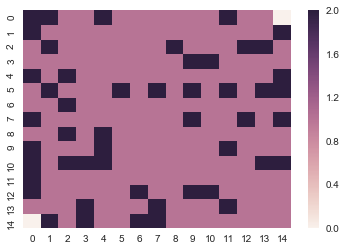

In [8]:
# create a maze
maze_size = 15
num_obstacle = 50
m = Maze(maze_size, num_obstacle)
m.describe()

In [9]:
states = np.reshape(np.arange(maze_size**2), [maze_size,maze_size])
actions =[[0,1],[-1,0],[0,-1],[1,0]]

a = Agent(states, actions)

step:0 MAP


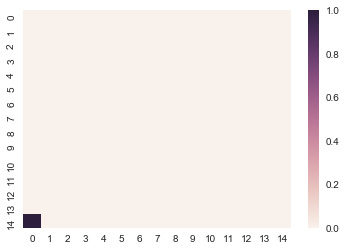

step:1000 MAP


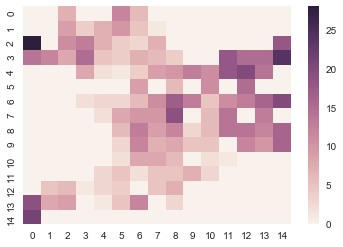

step:2000 MAP


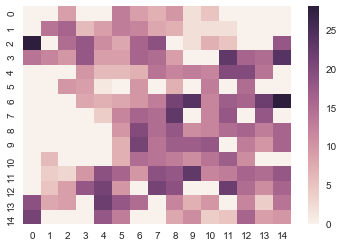

step:3000 MAP


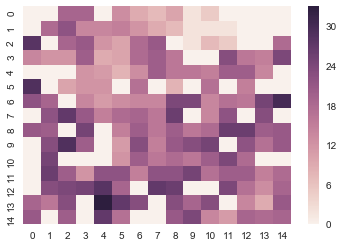

step:3210 Goal!
step:3494 Goal!
step:3841 Goal!
step:4000 MAP


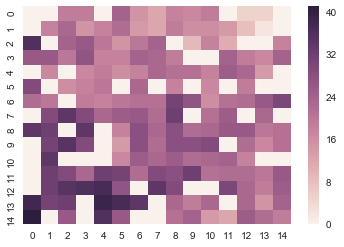

step:4045 Goal!
step:4344 Goal!
step:4682 Goal!
step:4804 Goal!
step:4984 Goal!
step:5000 MAP


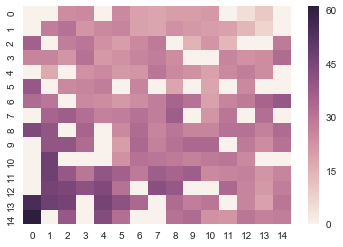

step:5181 Goal!
step:5508 Goal!
step:5672 Goal!
step:5774 Goal!
step:5918 Goal!
step:6000 MAP


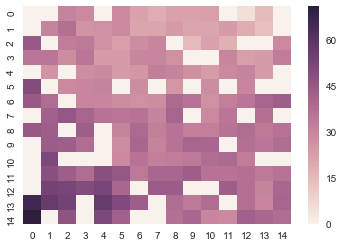

step:6010 Goal!
step:6143 Goal!
step:6267 Goal!
step:6560 Goal!
step:6640 Goal!
step:6744 Goal!
step:6821 Goal!
step:6883 Goal!
step:6967 Goal!
step:7000 MAP


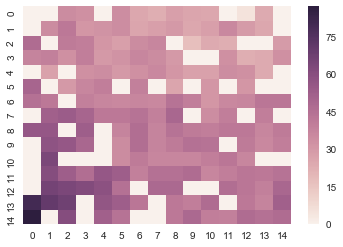

step:7035 Goal!
step:7269 Goal!
step:7363 Goal!
step:7408 Goal!
step:7499 Goal!
step:7637 Goal!
step:7680 Goal!
step:7752 Goal!
step:7808 Goal!
step:7872 Goal!
step:7928 Goal!
step:7990 Goal!
step:8000 MAP


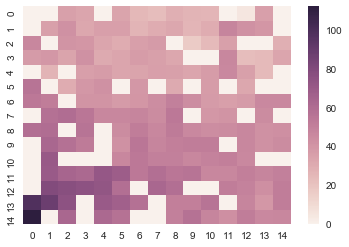

step:8076 Goal!
step:8118 Goal!
step:8182 Goal!
step:8263 Goal!
step:8369 Goal!
step:8457 Goal!
step:8523 Goal!
step:8581 Goal!
step:8637 Goal!
step:8672 Goal!
step:8711 Goal!
step:8851 Goal!
step:8893 Goal!
step:8934 Goal!
step:9000 MAP


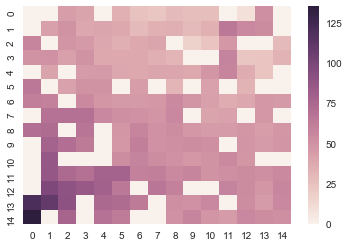

step:9017 Goal!
step:9051 Goal!
step:9097 Goal!
step:9160 Goal!
step:9226 Goal!
step:9269 Goal!
step:9314 Goal!
step:9364 Goal!
step:9421 Goal!
step:9459 Goal!
step:9503 Goal!
step:9572 Goal!
step:9609 Goal!
step:9641 Goal!
step:9691 Goal!
step:9722 Goal!
step:9757 Goal!
step:9793 Goal!
step:9830 Goal!
step:9872 Goal!
step:9918 Goal!
step:9947 Goal!
step:9994 Goal!
step:10000 MAP


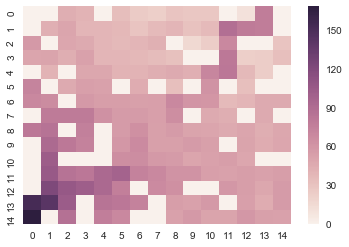

step:10032 Goal!
step:10063 Goal!
step:10101 Goal!
step:10132 Goal!
step:10165 Goal!
step:10224 Goal!
step:10264 Goal!
step:10292 Goal!
step:10327 Goal!
step:10359 Goal!
step:10392 Goal!
step:10421 Goal!
step:10451 Goal!
step:10484 Goal!
step:10512 Goal!
step:10545 Goal!
step:10573 Goal!
step:10603 Goal!
step:10639 Goal!
step:10667 Goal!
step:10703 Goal!
step:10732 Goal!
step:10766 Goal!
step:10795 Goal!
step:10825 Goal!
step:10859 Goal!
step:10891 Goal!
step:10923 Goal!
step:10951 Goal!
step:10983 Goal!
step:11000 MAP


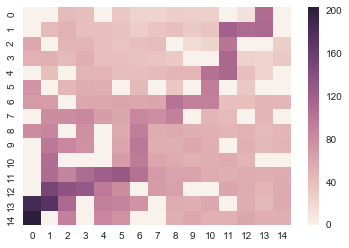

step:11016 Goal!
step:11048 Goal!
step:11079 Goal!
step:11107 Goal!
step:11135 Goal!
step:11169 Goal!
step:11199 Goal!
step:11227 Goal!
step:11255 Goal!
step:11286 Goal!
step:11318 Goal!
step:11346 Goal!
step:11376 Goal!
step:11406 Goal!
step:11434 Goal!
step:11463 Goal!
step:11497 Goal!
step:11525 Goal!
step:11559 Goal!
step:11590 Goal!
step:11621 Goal!
step:11649 Goal!
step:11678 Goal!
step:11706 Goal!
step:11736 Goal!
step:11764 Goal!
step:11794 Goal!
step:11827 Goal!
step:11857 Goal!
step:11894 Goal!
step:11922 Goal!
step:11954 Goal!
step:11984 Goal!
step:12000 MAP


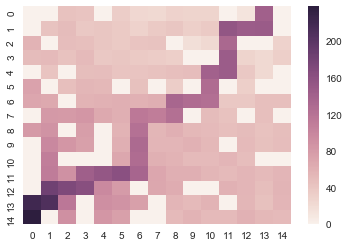

step:12020 Goal!
step:12049 Goal!
step:12082 Goal!
step:12112 Goal!
step:12143 Goal!
step:12175 Goal!
step:12210 Goal!
step:12240 Goal!
step:12275 Goal!
step:12311 Goal!
step:12343 Goal!
step:12377 Goal!
step:12405 Goal!
step:12433 Goal!
step:12469 Goal!
step:12503 Goal!
step:12533 Goal!
step:12565 Goal!
step:12599 Goal!
step:12627 Goal!
step:12656 Goal!
step:12684 Goal!
step:12714 Goal!
step:12751 Goal!
step:12779 Goal!
step:12809 Goal!
step:12841 Goal!
step:12875 Goal!
step:12903 Goal!
step:12932 Goal!
step:12960 Goal!
step:12989 Goal!
step:13000 MAP


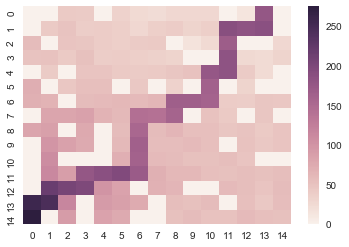

step:13021 Goal!
step:13052 Goal!
step:13084 Goal!
step:13115 Goal!
step:13145 Goal!
step:13173 Goal!
step:13205 Goal!
step:13234 Goal!
step:13262 Goal!
step:13294 Goal!
step:13326 Goal!
step:13361 Goal!
step:13389 Goal!
step:13421 Goal!
step:13454 Goal!
step:13482 Goal!
step:13519 Goal!
step:13556 Goal!
step:13588 Goal!
step:13616 Goal!
step:13648 Goal!
step:13678 Goal!
step:13706 Goal!
step:13739 Goal!
step:13768 Goal!
step:13798 Goal!
step:13826 Goal!
step:13857 Goal!
step:13890 Goal!
step:13921 Goal!
step:13951 Goal!
step:13984 Goal!
step:14000 MAP


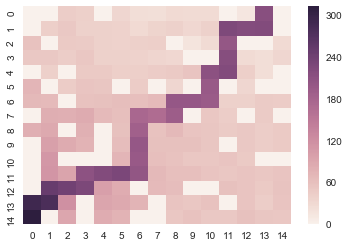

step:14024 Goal!
step:14057 Goal!
step:14092 Goal!
step:14120 Goal!
step:14150 Goal!
step:14178 Goal!
step:14208 Goal!
step:14236 Goal!
step:14264 Goal!
step:14295 Goal!
step:14332 Goal!
step:14360 Goal!
step:14388 Goal!
step:14416 Goal!
step:14444 Goal!
step:14473 Goal!
step:14501 Goal!
step:14534 Goal!
step:14563 Goal!
step:14599 Goal!
step:14630 Goal!
step:14660 Goal!
step:14693 Goal!
step:14731 Goal!
step:14770 Goal!
step:14801 Goal!
step:14833 Goal!
step:14865 Goal!
step:14898 Goal!
step:14928 Goal!
step:14956 Goal!
step:14984 Goal!
step:15000 MAP


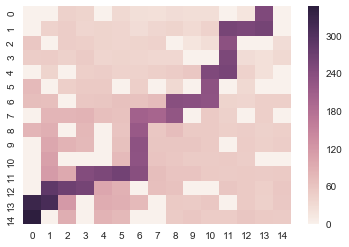

step:15018 Goal!
step:15050 Goal!
step:15080 Goal!
step:15109 Goal!
step:15142 Goal!
step:15173 Goal!
step:15201 Goal!
step:15233 Goal!
step:15265 Goal!
step:15295 Goal!
step:15324 Goal!
step:15362 Goal!
step:15391 Goal!
step:15419 Goal!
step:15450 Goal!
step:15485 Goal!
step:15515 Goal!
step:15543 Goal!
step:15574 Goal!
step:15603 Goal!
step:15635 Goal!
step:15666 Goal!
step:15696 Goal!
step:15727 Goal!
step:15757 Goal!
step:15789 Goal!
step:15821 Goal!
step:15855 Goal!
step:15887 Goal!
step:15918 Goal!
step:15946 Goal!
step:15978 Goal!
step:16000 MAP


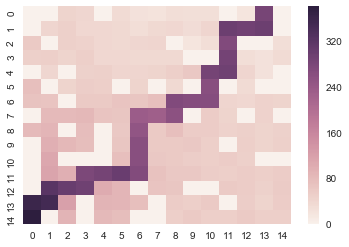

step:16006 Goal!
step:16037 Goal!
step:16069 Goal!
step:16099 Goal!
step:16127 Goal!
step:16157 Goal!
step:16194 Goal!
step:16224 Goal!
step:16253 Goal!
step:16285 Goal!
step:16313 Goal!
step:16343 Goal!
step:16374 Goal!
step:16408 Goal!
step:16436 Goal!
step:16464 Goal!
step:16494 Goal!
step:16526 Goal!
step:16555 Goal!
step:16587 Goal!
step:16619 Goal!
step:16647 Goal!
step:16680 Goal!
step:16709 Goal!
step:16738 Goal!
step:16771 Goal!
step:16799 Goal!
step:16827 Goal!
step:16859 Goal!
step:16890 Goal!
step:16921 Goal!
step:16949 Goal!
step:16979 Goal!
step:17000 MAP


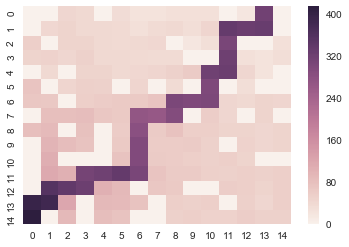

step:17012 Goal!
step:17042 Goal!
step:17074 Goal!
step:17111 Goal!
step:17140 Goal!
step:17170 Goal!
step:17206 Goal!
step:17236 Goal!
step:17272 Goal!
step:17302 Goal!
step:17332 Goal!
step:17367 Goal!
step:17402 Goal!
step:17434 Goal!
step:17468 Goal!
step:17501 Goal!
step:17532 Goal!
step:17564 Goal!
step:17596 Goal!
step:17629 Goal!
step:17669 Goal!
step:17699 Goal!
step:17731 Goal!
step:17763 Goal!
step:17793 Goal!
step:17827 Goal!
step:17858 Goal!
step:17892 Goal!
step:17920 Goal!
step:17948 Goal!
step:17976 Goal!
step:18000 MAP


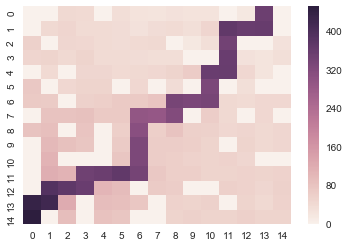

step:18011 Goal!
step:18042 Goal!
step:18074 Goal!
step:18107 Goal!
step:18137 Goal!
step:18169 Goal!
step:18201 Goal!
step:18229 Goal!
step:18263 Goal!
step:18293 Goal!
step:18323 Goal!
step:18354 Goal!
step:18384 Goal!
step:18415 Goal!
step:18444 Goal!
step:18476 Goal!
step:18506 Goal!
step:18538 Goal!
step:18576 Goal!
step:18604 Goal!
step:18632 Goal!
step:18660 Goal!
step:18690 Goal!
step:18720 Goal!
step:18751 Goal!
step:18783 Goal!
step:18819 Goal!
step:18849 Goal!
step:18889 Goal!
step:18924 Goal!
step:18958 Goal!
step:18993 Goal!
step:19000 MAP


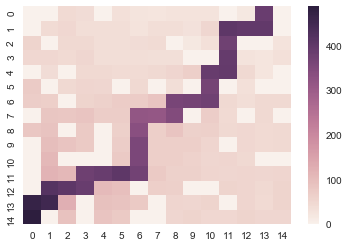

step:19025 Goal!
step:19053 Goal!
step:19084 Goal!
step:19112 Goal!
step:19145 Goal!
step:19179 Goal!
step:19210 Goal!
step:19247 Goal!
step:19279 Goal!
step:19314 Goal!
step:19345 Goal!
step:19379 Goal!
step:19413 Goal!
step:19449 Goal!
step:19478 Goal!
step:19506 Goal!
step:19538 Goal!
step:19569 Goal!
step:19597 Goal!
step:19729 Goal!
step:19759 Goal!
step:19789 Goal!
step:19818 Goal!
step:19850 Goal!
step:19882 Goal!
step:19914 Goal!
step:19942 Goal!
step:19978 Goal!
step:20000 MAP


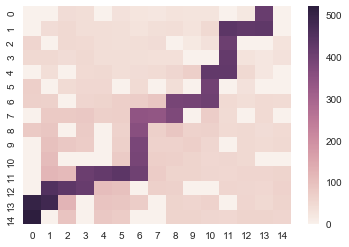

step:20008 Goal!
step:20036 Goal!
step:20071 Goal!
step:20102 Goal!
step:20133 Goal!
step:20165 Goal!
step:20194 Goal!
step:20226 Goal!
step:20256 Goal!
step:20285 Goal!
step:20323 Goal!
step:20351 Goal!
step:20383 Goal!
step:20418 Goal!
step:20448 Goal!
step:20479 Goal!
step:20511 Goal!
step:20539 Goal!
step:20572 Goal!
step:20600 Goal!
step:20630 Goal!
step:20660 Goal!
step:20688 Goal!
step:20720 Goal!
step:20748 Goal!
step:20776 Goal!
step:20805 Goal!
step:20836 Goal!
step:20869 Goal!
step:20899 Goal!
step:20931 Goal!
step:20966 Goal!
step:20999 Goal!
step:21000 MAP


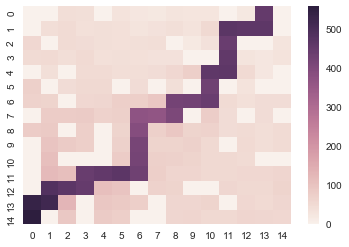

step:21028 Goal!
step:21060 Goal!
step:21091 Goal!
step:21123 Goal!
step:21156 Goal!
step:21184 Goal!
step:21214 Goal!
step:21244 Goal!
step:21274 Goal!
step:21302 Goal!
step:21334 Goal!
step:21365 Goal!
step:21395 Goal!
step:21423 Goal!
step:21460 Goal!
step:21490 Goal!
step:21521 Goal!
step:21552 Goal!
step:21580 Goal!
step:21610 Goal!
step:21645 Goal!
step:21675 Goal!
step:21710 Goal!
step:21738 Goal!
step:21770 Goal!
step:21800 Goal!
step:21831 Goal!
step:21859 Goal!
step:21889 Goal!
step:21921 Goal!
step:21953 Goal!
step:21981 Goal!
step:22000 MAP


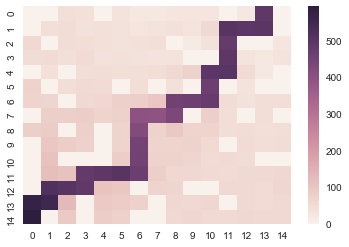

step:22009 Goal!
step:22041 Goal!
step:22072 Goal!
step:22104 Goal!
step:22132 Goal!
step:22160 Goal!
step:22192 Goal!
step:22228 Goal!
step:22260 Goal!
step:22293 Goal!
step:22323 Goal!
step:22355 Goal!
step:22386 Goal!
step:22419 Goal!
step:22456 Goal!
step:22485 Goal!
step:22514 Goal!
step:22550 Goal!
step:22578 Goal!
step:22608 Goal!
step:22642 Goal!
step:22677 Goal!
step:22713 Goal!
step:22742 Goal!
step:22773 Goal!
step:22802 Goal!
step:22832 Goal!
step:22864 Goal!
step:22892 Goal!
step:22921 Goal!
step:22954 Goal!
step:22984 Goal!
step:23000 MAP


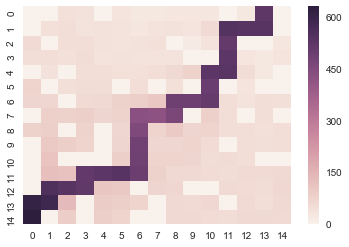

step:23014 Goal!
step:23057 Goal!
step:23090 Goal!
step:23118 Goal!
step:23146 Goal!
step:23177 Goal!
step:23208 Goal!
step:23238 Goal!
step:23271 Goal!
step:23299 Goal!
step:23338 Goal!
step:23366 Goal!
step:23395 Goal!
step:23423 Goal!
step:23459 Goal!
step:23487 Goal!
step:23518 Goal!
step:23547 Goal!
step:23582 Goal!
step:23610 Goal!
step:23640 Goal!
step:23672 Goal!
step:23702 Goal!
step:23734 Goal!
step:23767 Goal!
step:23800 Goal!
step:23828 Goal!
step:23860 Goal!
step:23895 Goal!
step:23925 Goal!
step:23956 Goal!
step:23990 Goal!
step:24000 MAP


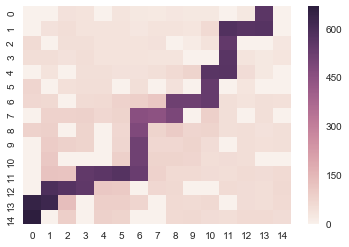

step:24020 Goal!
step:24050 Goal!
step:24081 Goal!
step:24109 Goal!
step:24143 Goal!
step:24177 Goal!
step:24205 Goal!
step:24234 Goal!
step:24264 Goal!
step:24294 Goal!
step:24329 Goal!
step:24360 Goal!
step:24390 Goal!
step:24421 Goal!
step:24454 Goal!
step:24483 Goal!
step:24516 Goal!
step:24544 Goal!
step:24575 Goal!
step:24607 Goal!
step:24635 Goal!
step:24663 Goal!
step:24696 Goal!
step:24724 Goal!
step:24754 Goal!
step:24784 Goal!
step:24814 Goal!
step:24846 Goal!
step:24878 Goal!
step:24912 Goal!
step:24940 Goal!
step:24968 Goal!
step:25000 MAP


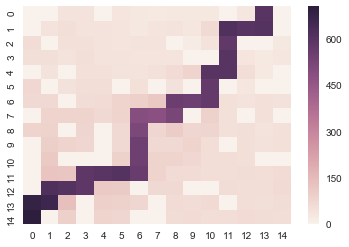

step:25001 Goal!
step:25033 Goal!
step:25064 Goal!
step:25094 Goal!
step:25127 Goal!
step:25157 Goal!
step:25188 Goal!
step:25220 Goal!
step:25249 Goal!
step:25278 Goal!
step:25307 Goal!
step:25335 Goal!
step:25363 Goal!
step:25391 Goal!
step:25427 Goal!
step:25459 Goal!
step:25487 Goal!
step:25521 Goal!
step:25553 Goal!
step:25586 Goal!
step:25616 Goal!
step:25655 Goal!
step:25686 Goal!
step:25716 Goal!
step:25749 Goal!
step:25780 Goal!
step:25814 Goal!
step:25843 Goal!
step:25874 Goal!
step:25903 Goal!
step:25938 Goal!
step:25967 Goal!
step:25997 Goal!
step:26000 MAP


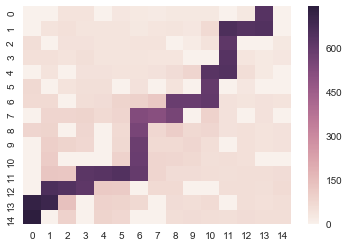

step:26030 Goal!
step:26058 Goal!
step:26090 Goal!
step:26124 Goal!
step:26155 Goal!
step:26192 Goal!
step:26221 Goal!
step:26256 Goal!
step:26284 Goal!
step:26316 Goal!
step:26344 Goal!
step:26377 Goal!
step:26407 Goal!
step:26437 Goal!
step:26469 Goal!
step:26503 Goal!
step:26535 Goal!
step:26569 Goal!
step:26597 Goal!
step:26628 Goal!
step:26666 Goal!
step:26697 Goal!
step:26729 Goal!
step:26759 Goal!
step:26788 Goal!
step:26819 Goal!
step:26851 Goal!
step:26883 Goal!
step:26917 Goal!
step:26950 Goal!
step:26978 Goal!
step:27000 MAP


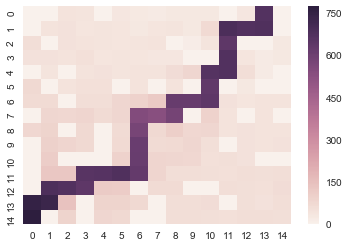

step:27007 Goal!
step:27035 Goal!
step:27065 Goal!
step:27096 Goal!
step:27125 Goal!
step:27159 Goal!
step:27187 Goal!
step:27223 Goal!
step:27253 Goal!
step:27287 Goal!
step:27322 Goal!
step:27350 Goal!
step:27389 Goal!
step:27417 Goal!
step:27451 Goal!
step:27479 Goal!
step:27509 Goal!
step:27539 Goal!
step:27573 Goal!
step:27608 Goal!
step:27641 Goal!
step:27673 Goal!
step:27706 Goal!
step:27739 Goal!
step:27772 Goal!
step:27805 Goal!
step:27833 Goal!
step:27864 Goal!
step:27897 Goal!
step:27929 Goal!
step:27963 Goal!
step:27998 Goal!
step:28000 MAP


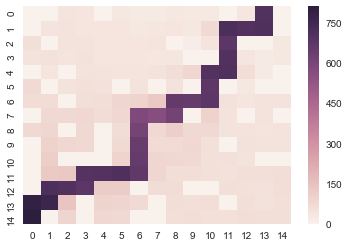

step:28033 Goal!
step:28069 Goal!
step:28103 Goal!
step:28133 Goal!
step:28161 Goal!
step:28190 Goal!
step:28220 Goal!
step:28250 Goal!
step:28280 Goal!
step:28310 Goal!
step:28341 Goal!
step:28372 Goal!
step:28404 Goal!
step:28439 Goal!
step:28473 Goal!
step:28504 Goal!
step:28534 Goal!
step:28566 Goal!
step:28596 Goal!
step:28629 Goal!
step:28665 Goal!
step:28695 Goal!
step:28724 Goal!
step:28752 Goal!
step:28782 Goal!
step:28812 Goal!
step:28845 Goal!
step:28875 Goal!
step:28910 Goal!
step:28942 Goal!
step:28970 Goal!
step:29000 MAP


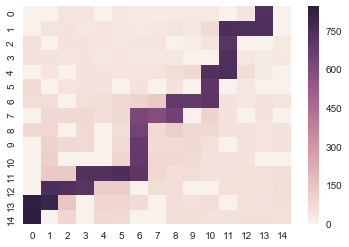

step:29005 Goal!
step:29035 Goal!
step:29067 Goal!
step:29097 Goal!
step:29129 Goal!
step:29159 Goal!
step:29187 Goal!
step:29215 Goal!
step:29251 Goal!
step:29286 Goal!
step:29320 Goal!
step:29351 Goal!
step:29380 Goal!
step:29412 Goal!
step:29445 Goal!
step:29482 Goal!
step:29516 Goal!
step:29546 Goal!
step:29574 Goal!
step:29603 Goal!
step:29633 Goal!
step:29665 Goal!
step:29694 Goal!
step:29726 Goal!
step:29754 Goal!
step:29785 Goal!
step:29815 Goal!
step:29849 Goal!
step:29878 Goal!
step:29907 Goal!
step:29937 Goal!
step:29969 Goal!
step:29999 Goal!
step:30000 MAP


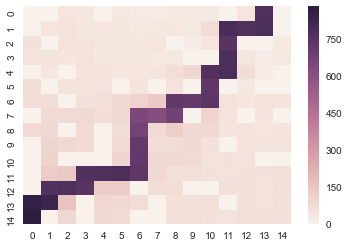

step:30030 Goal!
step:30060 Goal!
step:30090 Goal!
step:30121 Goal!
step:30151 Goal!
step:30181 Goal!
step:30214 Goal!
step:30246 Goal!
step:30276 Goal!
step:30308 Goal!
step:30340 Goal!
step:30369 Goal!
step:30401 Goal!
step:30431 Goal!
step:30463 Goal!
step:30495 Goal!
step:30526 Goal!
step:30558 Goal!
step:30587 Goal!
step:30620 Goal!
step:30652 Goal!
step:30683 Goal!
step:30717 Goal!
step:30747 Goal!
step:30782 Goal!
step:30813 Goal!
step:30843 Goal!
step:30871 Goal!
step:30906 Goal!
step:30937 Goal!
step:30965 Goal!
step:30997 Goal!
step:31000 MAP


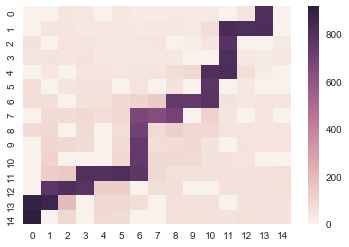

step:31034 Goal!
step:31065 Goal!
step:31101 Goal!
step:31131 Goal!
step:31161 Goal!
step:31191 Goal!
step:31226 Goal!
step:31258 Goal!
step:31287 Goal!
step:31320 Goal!
step:31353 Goal!
step:31385 Goal!
step:31413 Goal!
step:31448 Goal!
step:31478 Goal!
step:31510 Goal!
step:31538 Goal!
step:31567 Goal!
step:31595 Goal!
step:31629 Goal!
step:31659 Goal!
step:31689 Goal!
step:31717 Goal!
step:31751 Goal!
step:31779 Goal!
step:31814 Goal!
step:31848 Goal!
step:31878 Goal!
step:31916 Goal!
step:31948 Goal!
step:31978 Goal!
step:32000 MAP


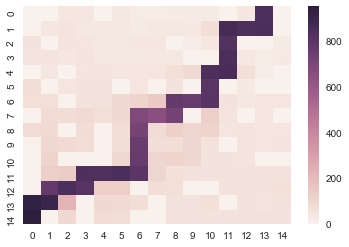

step:32009 Goal!
step:32042 Goal!
step:32074 Goal!
step:32105 Goal!
step:32140 Goal!
step:32174 Goal!
step:32205 Goal!
step:32233 Goal!
step:32268 Goal!
step:32297 Goal!
step:32328 Goal!
step:32360 Goal!
step:32395 Goal!
step:32428 Goal!
step:32461 Goal!
step:32489 Goal!
step:32518 Goal!
step:32550 Goal!
step:32580 Goal!
step:32614 Goal!
step:32648 Goal!
step:32677 Goal!
step:32707 Goal!
step:32736 Goal!
step:32764 Goal!
step:32798 Goal!
step:32834 Goal!
step:32867 Goal!
step:32895 Goal!
step:32926 Goal!
step:32961 Goal!
step:32995 Goal!
step:33000 MAP


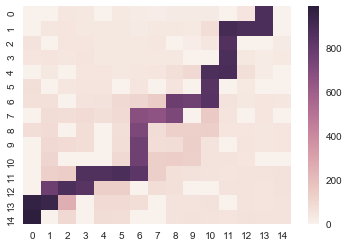

step:33025 Goal!
step:33056 Goal!
step:33085 Goal!
step:33119 Goal!
step:33154 Goal!
step:33185 Goal!
step:33217 Goal!
step:33247 Goal!
step:33287 Goal!
step:33318 Goal!
step:33346 Goal!
step:33377 Goal!
step:33405 Goal!
step:33435 Goal!
step:33465 Goal!
step:33498 Goal!
step:33530 Goal!
step:33558 Goal!
step:33586 Goal!
step:33618 Goal!
step:33649 Goal!
step:33682 Goal!
step:33711 Goal!
step:33742 Goal!
step:33772 Goal!
step:33808 Goal!
step:33843 Goal!
step:33874 Goal!
step:33906 Goal!
step:33937 Goal!
step:33969 Goal!
step:33997 Goal!
step:34000 MAP


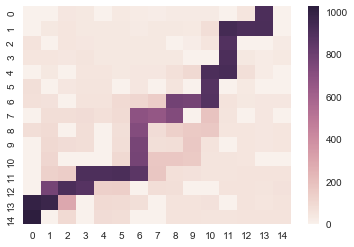

step:34027 Goal!
step:34057 Goal!
step:34085 Goal!
step:34117 Goal!
step:34152 Goal!
step:34180 Goal!
step:34210 Goal!
step:34238 Goal!
step:34268 Goal!
step:34302 Goal!
step:34337 Goal!
step:34370 Goal!
step:34401 Goal!
step:34436 Goal!
step:34464 Goal!
step:34494 Goal!
step:34530 Goal!
step:34565 Goal!
step:34593 Goal!
step:34624 Goal!
step:34655 Goal!
step:34684 Goal!
step:34713 Goal!
step:34743 Goal!
step:34774 Goal!
step:34808 Goal!
step:34838 Goal!
step:34869 Goal!
step:34900 Goal!
step:34930 Goal!
step:34958 Goal!
step:34990 Goal!
step:35000 MAP


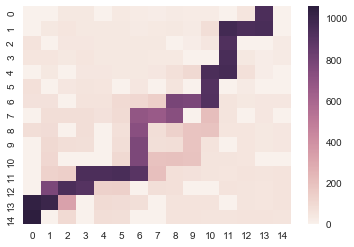

step:35021 Goal!
step:35051 Goal!
step:35084 Goal!
step:35116 Goal!
step:35147 Goal!
step:35179 Goal!
step:35212 Goal!
step:35244 Goal!
step:35273 Goal!
step:35301 Goal!
step:35333 Goal!
step:35367 Goal!
step:35399 Goal!
step:35431 Goal!
step:35463 Goal!
step:35491 Goal!
step:35523 Goal!
step:35553 Goal!
step:35582 Goal!
step:35618 Goal!
step:35648 Goal!
step:35680 Goal!
step:35708 Goal!
step:35736 Goal!
step:35764 Goal!
step:35798 Goal!
step:35826 Goal!
step:35856 Goal!
step:35889 Goal!
step:35917 Goal!
step:35945 Goal!
step:35978 Goal!
step:36000 MAP


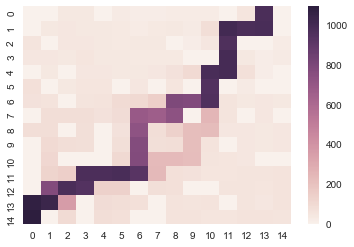

step:36008 Goal!
step:36042 Goal!
step:36073 Goal!
step:36108 Goal!
step:36136 Goal!
step:36172 Goal!
step:36209 Goal!
step:36240 Goal!
step:36270 Goal!
step:36304 Goal!
step:36338 Goal!
step:36374 Goal!
step:36407 Goal!
step:36443 Goal!
step:36474 Goal!
step:36508 Goal!
step:36541 Goal!
step:36574 Goal!
step:36606 Goal!
step:36639 Goal!
step:36671 Goal!
step:36704 Goal!
step:36739 Goal!
step:36773 Goal!
step:36806 Goal!
step:36840 Goal!
step:36878 Goal!
step:36907 Goal!
step:36935 Goal!
step:36967 Goal!
step:36999 Goal!
step:37000 MAP


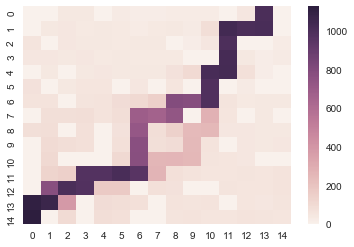

step:37032 Goal!
step:37063 Goal!
step:37093 Goal!
step:37126 Goal!
step:37155 Goal!
step:37183 Goal!
step:37213 Goal!
step:37241 Goal!
step:37273 Goal!
step:37301 Goal!
step:37333 Goal!
step:37363 Goal!
step:37392 Goal!
step:37423 Goal!
step:37457 Goal!
step:37489 Goal!
step:37518 Goal!
step:37551 Goal!
step:37581 Goal!
step:37614 Goal!
step:37644 Goal!
step:37672 Goal!
step:37700 Goal!
step:37732 Goal!
step:37764 Goal!
step:37797 Goal!
step:37827 Goal!
step:37856 Goal!
step:37888 Goal!
step:37917 Goal!
step:37948 Goal!
step:37977 Goal!
step:38000 MAP


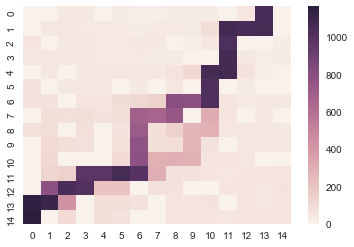

step:38005 Goal!
step:38035 Goal!
step:38069 Goal!
step:38097 Goal!
step:38129 Goal!
step:38157 Goal!
step:38185 Goal!
step:38217 Goal!
step:38249 Goal!
step:38282 Goal!
step:38315 Goal!
step:38343 Goal!
step:38374 Goal!
step:38402 Goal!
step:38436 Goal!
step:38468 Goal!
step:38496 Goal!
step:38526 Goal!
step:38554 Goal!
step:38584 Goal!
step:38613 Goal!
step:38646 Goal!
step:38675 Goal!
step:38712 Goal!
step:38745 Goal!
step:38773 Goal!
step:38804 Goal!
step:38838 Goal!
step:38866 Goal!
step:38900 Goal!
step:38930 Goal!
step:38964 Goal!
step:38996 Goal!
step:39000 MAP


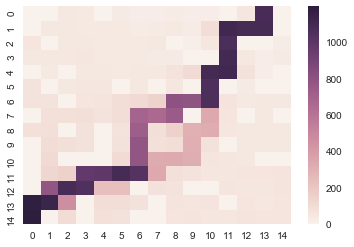

step:39026 Goal!
step:39061 Goal!
step:39090 Goal!
step:39118 Goal!
step:39150 Goal!
step:39178 Goal!
step:39216 Goal!
step:39247 Goal!
step:39277 Goal!
step:39307 Goal!
step:39339 Goal!
step:39375 Goal!
step:39407 Goal!
step:39439 Goal!
step:39468 Goal!
step:39500 Goal!
step:39532 Goal!
step:39568 Goal!
step:39597 Goal!
step:39630 Goal!
step:39660 Goal!
step:39692 Goal!
step:39724 Goal!
step:39762 Goal!
step:39795 Goal!
step:39824 Goal!
step:39852 Goal!
step:39889 Goal!
step:39921 Goal!
step:39953 Goal!
step:39986 Goal!
step:40000 MAP


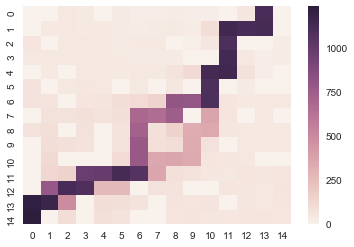

step:40015 Goal!
step:40047 Goal!
step:40077 Goal!
step:40112 Goal!
step:40142 Goal!
step:40171 Goal!
step:40200 Goal!
step:40229 Goal!
step:40257 Goal!
step:40287 Goal!
step:40317 Goal!
step:40348 Goal!
step:40383 Goal!
step:40414 Goal!
step:40442 Goal!
step:40474 Goal!
step:40505 Goal!
step:40542 Goal!
step:40570 Goal!
step:40600 Goal!
step:40631 Goal!
step:40659 Goal!
step:40689 Goal!
step:40721 Goal!
step:40751 Goal!
step:40786 Goal!
step:40816 Goal!
step:40850 Goal!
step:40882 Goal!
step:40916 Goal!
step:40944 Goal!
step:40974 Goal!
step:41000 MAP


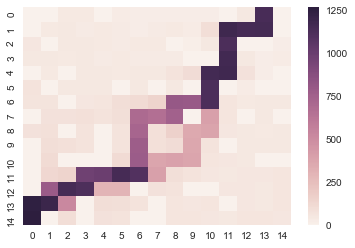

step:41006 Goal!
step:41036 Goal!
step:41064 Goal!
step:41096 Goal!
step:41134 Goal!
step:41168 Goal!
step:41196 Goal!
step:41227 Goal!
step:41259 Goal!
step:41298 Goal!
step:41328 Goal!
step:41360 Goal!
step:41389 Goal!
step:41417 Goal!
step:41448 Goal!
step:41478 Goal!
step:41508 Goal!
step:41540 Goal!
step:41571 Goal!
step:41601 Goal!
step:41632 Goal!
step:41662 Goal!
step:41694 Goal!
step:41727 Goal!
step:41755 Goal!
step:41785 Goal!
step:41816 Goal!
step:41845 Goal!
step:41880 Goal!
step:41914 Goal!
step:41949 Goal!
step:41989 Goal!
step:42000 MAP


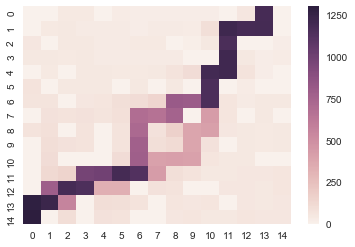

step:42019 Goal!
step:42052 Goal!
step:42087 Goal!
step:42119 Goal!
step:42150 Goal!
step:42180 Goal!
step:42208 Goal!
step:42241 Goal!
step:42273 Goal!
step:42305 Goal!
step:42335 Goal!
step:42368 Goal!
step:42396 Goal!
step:42430 Goal!
step:42468 Goal!
step:42500 Goal!
step:42531 Goal!
step:42560 Goal!
step:42591 Goal!
step:42621 Goal!
step:42649 Goal!
step:42680 Goal!
step:42711 Goal!
step:42739 Goal!
step:42767 Goal!
step:42797 Goal!
step:42826 Goal!
step:42866 Goal!
step:42894 Goal!
step:42931 Goal!
step:42961 Goal!
step:42990 Goal!
step:43000 MAP


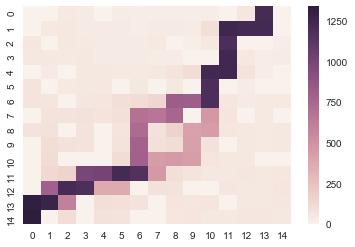

step:43022 Goal!
step:43050 Goal!
step:43082 Goal!
step:43118 Goal!
step:43149 Goal!
step:43177 Goal!
step:43207 Goal!
step:43235 Goal!
step:43263 Goal!
step:43291 Goal!
step:43324 Goal!
step:43365 Goal!
step:43397 Goal!
step:43425 Goal!
step:43459 Goal!
step:43489 Goal!
step:43526 Goal!
step:43558 Goal!
step:43593 Goal!
step:43628 Goal!
step:43661 Goal!
step:43690 Goal!
step:43724 Goal!
step:43755 Goal!
step:43787 Goal!
step:43816 Goal!
step:43844 Goal!
step:43872 Goal!
step:43906 Goal!
step:43936 Goal!
step:43971 Goal!
step:44000 MAP


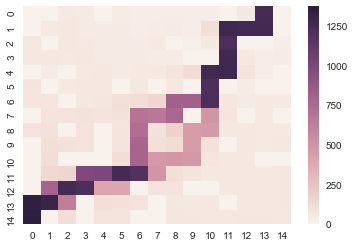

step:44005 Goal!
step:44036 Goal!
step:44064 Goal!
step:44098 Goal!
step:44131 Goal!
step:44163 Goal!
step:44198 Goal!
step:44227 Goal!
step:44256 Goal!
step:44288 Goal!
step:44320 Goal!
step:44352 Goal!
step:44384 Goal!
step:44417 Goal!
step:44447 Goal!
step:44476 Goal!
step:44504 Goal!
step:44536 Goal!
step:44565 Goal!
step:44593 Goal!
step:44621 Goal!
step:44651 Goal!
step:44684 Goal!
step:44714 Goal!
step:44744 Goal!
step:44773 Goal!
step:44802 Goal!
step:44834 Goal!
step:44868 Goal!
step:44899 Goal!
step:44931 Goal!
step:44964 Goal!
step:44993 Goal!
step:45000 MAP


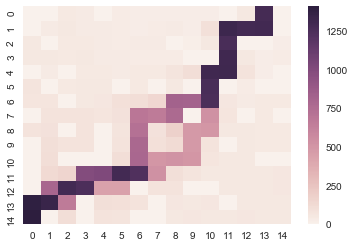

step:45023 Goal!
step:45051 Goal!
step:45079 Goal!
step:45108 Goal!
step:45137 Goal!
step:45173 Goal!
step:45201 Goal!
step:45230 Goal!
step:45264 Goal!
step:45305 Goal!
step:45336 Goal!
step:45366 Goal!
step:45408 Goal!
step:45441 Goal!
step:45477 Goal!
step:45510 Goal!
step:45538 Goal!
step:45570 Goal!
step:45601 Goal!
step:45631 Goal!
step:45663 Goal!
step:45699 Goal!
step:45730 Goal!
step:45759 Goal!
step:45790 Goal!
step:45828 Goal!
step:45861 Goal!
step:45889 Goal!
step:45921 Goal!
step:45954 Goal!
step:45986 Goal!
step:46000 MAP


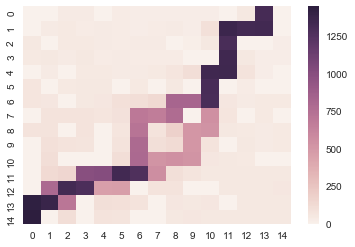

step:46019 Goal!
step:46047 Goal!
step:46081 Goal!
step:46109 Goal!
step:46144 Goal!
step:46182 Goal!
step:46216 Goal!
step:46245 Goal!
step:46274 Goal!
step:46304 Goal!
step:46340 Goal!
step:46379 Goal!
step:46409 Goal!
step:46441 Goal!
step:46475 Goal!
step:46508 Goal!
step:46539 Goal!
step:46571 Goal!
step:46600 Goal!
step:46630 Goal!
step:46661 Goal!
step:46691 Goal!
step:46721 Goal!
step:46753 Goal!
step:46789 Goal!
step:46819 Goal!
step:46852 Goal!
step:46882 Goal!
step:46915 Goal!
step:46946 Goal!
step:46978 Goal!
step:47000 MAP


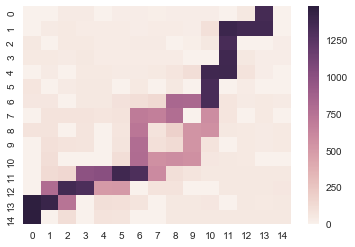

step:47009 Goal!
step:47040 Goal!
step:47069 Goal!
step:47097 Goal!
step:47129 Goal!
step:47160 Goal!
step:47190 Goal!
step:47226 Goal!
step:47260 Goal!
step:47293 Goal!
step:47330 Goal!
step:47363 Goal!
step:47397 Goal!
step:47433 Goal!
step:47469 Goal!
step:47502 Goal!
step:47530 Goal!
step:47562 Goal!
step:47597 Goal!
step:47628 Goal!
step:47657 Goal!
step:47691 Goal!
step:47727 Goal!
step:47757 Goal!
step:47792 Goal!
step:47822 Goal!
step:47856 Goal!
step:47890 Goal!
step:47921 Goal!
step:47950 Goal!
step:47980 Goal!
step:48000 MAP


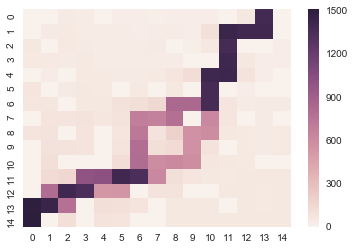

step:48008 Goal!
step:48038 Goal!
step:48066 Goal!
step:48098 Goal!
step:48133 Goal!
step:48161 Goal!
step:48190 Goal!
step:48228 Goal!
step:48257 Goal!
step:48286 Goal!
step:48316 Goal!
step:48346 Goal!
step:48376 Goal!
step:48415 Goal!
step:48444 Goal!
step:48474 Goal!
step:48506 Goal!
step:48541 Goal!
step:48574 Goal!
step:48604 Goal!
step:48638 Goal!
step:48666 Goal!
step:48700 Goal!
step:48732 Goal!
step:48764 Goal!
step:48792 Goal!
step:48826 Goal!
step:48856 Goal!
step:48884 Goal!
step:48916 Goal!
step:48946 Goal!
step:48976 Goal!
step:49000 MAP


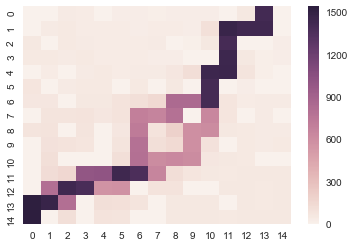

step:49007 Goal!
step:49038 Goal!
step:49070 Goal!
step:49098 Goal!
step:49128 Goal!
step:49156 Goal!
step:49190 Goal!
step:49220 Goal!
step:49252 Goal!
step:49284 Goal!
step:49314 Goal!
step:49344 Goal!
step:49375 Goal!
step:49405 Goal!
step:49439 Goal!
step:49475 Goal!
step:49508 Goal!
step:49544 Goal!
step:49579 Goal!
step:49609 Goal!
step:49638 Goal!
step:49668 Goal!
step:49697 Goal!
step:49727 Goal!
step:49757 Goal!
step:49790 Goal!
step:49822 Goal!
step:49854 Goal!
step:49889 Goal!
step:49920 Goal!
step:49955 Goal!
step:49986 Goal!
step:50000 MAP


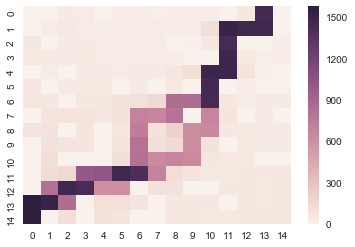

step:50018 Goal!
step:50048 Goal!
step:50080 Goal!
step:50118 Goal!
step:50153 Goal!
step:50181 Goal!
step:50211 Goal!
step:50244 Goal!
step:50275 Goal!
step:50305 Goal!
step:50334 Goal!
step:50369 Goal!
step:50399 Goal!
step:50435 Goal!
step:50469 Goal!
step:50501 Goal!
step:50536 Goal!
step:50565 Goal!
step:50593 Goal!
step:50626 Goal!
step:50657 Goal!
step:50685 Goal!
step:50715 Goal!
step:50744 Goal!
step:50773 Goal!
step:50803 Goal!
step:50831 Goal!
step:50861 Goal!
step:50890 Goal!
step:50920 Goal!
step:50950 Goal!
step:50979 Goal!
step:51000 MAP


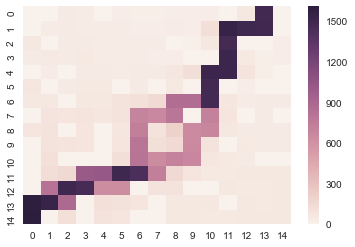

step:51009 Goal!
step:51045 Goal!
step:51077 Goal!
step:51109 Goal!
step:51139 Goal!
step:51168 Goal!
step:51202 Goal!
step:51230 Goal!
step:51264 Goal!
step:51295 Goal!
step:51323 Goal!
step:51351 Goal!
step:51381 Goal!
step:51415 Goal!
step:51443 Goal!
step:51473 Goal!
step:51506 Goal!
step:51536 Goal!
step:51566 Goal!
step:51594 Goal!
step:51630 Goal!
step:51664 Goal!
step:51698 Goal!
step:51729 Goal!
step:51765 Goal!
step:51800 Goal!
step:51828 Goal!
step:51858 Goal!
step:51891 Goal!
step:51919 Goal!
step:51947 Goal!
step:51977 Goal!
step:52000 MAP


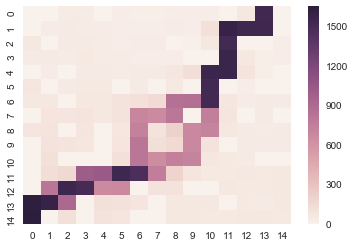

step:52007 Goal!
step:52036 Goal!
step:52067 Goal!
step:52097 Goal!
step:52125 Goal!
step:52155 Goal!
step:52183 Goal!
step:52213 Goal!
step:52243 Goal!
step:52272 Goal!
step:52305 Goal!
step:52335 Goal!
step:52365 Goal!
step:52401 Goal!
step:52433 Goal!
step:52463 Goal!
step:52497 Goal!
step:52532 Goal!
step:52564 Goal!
step:52594 Goal!
step:52624 Goal!
step:52654 Goal!
step:52688 Goal!
step:52718 Goal!
step:52754 Goal!
step:52782 Goal!
step:52812 Goal!
step:52842 Goal!
step:52870 Goal!
step:52898 Goal!
step:52927 Goal!
step:52959 Goal!
step:52988 Goal!
step:53000 MAP


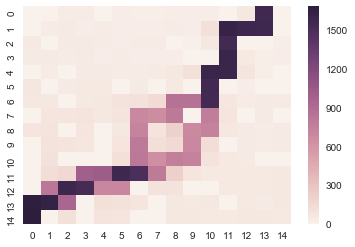

step:53018 Goal!
step:53056 Goal!
step:53090 Goal!
step:53125 Goal!
step:53153 Goal!
step:53181 Goal!
step:53216 Goal!
step:53250 Goal!
step:53285 Goal!
step:53316 Goal!
step:53352 Goal!
step:53380 Goal!
step:53412 Goal!
step:53444 Goal!
step:53475 Goal!
step:53507 Goal!
step:53537 Goal!
step:53567 Goal!
step:53597 Goal!
step:53628 Goal!
step:53657 Goal!
step:53694 Goal!
step:53726 Goal!
step:53754 Goal!
step:53784 Goal!
step:53813 Goal!
step:53842 Goal!
step:53875 Goal!
step:53903 Goal!
step:53935 Goal!
step:53978 Goal!
step:54000 MAP


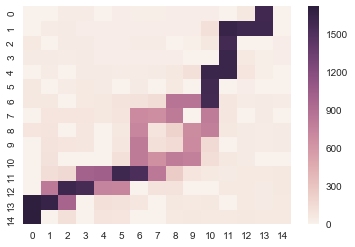

step:54012 Goal!
step:54044 Goal!
step:54073 Goal!
step:54103 Goal!
step:54131 Goal!
step:54160 Goal!
step:54190 Goal!
step:54226 Goal!
step:54255 Goal!
step:54289 Goal!
step:54319 Goal!
step:54351 Goal!
step:54379 Goal!
step:54415 Goal!
step:54445 Goal!
step:54477 Goal!
step:54505 Goal!
step:54535 Goal!
step:54568 Goal!
step:54597 Goal!
step:54627 Goal!
step:54659 Goal!
step:54688 Goal!
step:54718 Goal!
step:54746 Goal!
step:54777 Goal!
step:54813 Goal!
step:54843 Goal!
step:54874 Goal!
step:54911 Goal!
step:54942 Goal!
step:54975 Goal!
step:55000 MAP


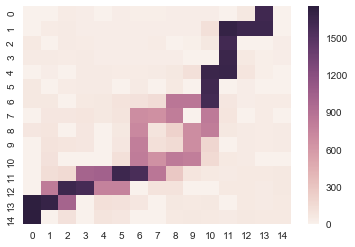

step:55005 Goal!
step:55033 Goal!
step:55063 Goal!
step:55093 Goal!
step:55127 Goal!
step:55159 Goal!
step:55193 Goal!
step:55229 Goal!
step:55257 Goal!
step:55285 Goal!
step:55315 Goal!
step:55350 Goal!
step:55381 Goal!
step:55415 Goal!
step:55446 Goal!
step:55478 Goal!
step:55507 Goal!
step:55541 Goal!
step:55573 Goal!
step:55603 Goal!
step:55637 Goal!
step:55668 Goal!
step:55699 Goal!
step:55733 Goal!
step:55766 Goal!
step:55795 Goal!
step:55827 Goal!
step:55866 Goal!
step:55894 Goal!
step:55928 Goal!
step:55958 Goal!
step:55990 Goal!
step:56000 MAP


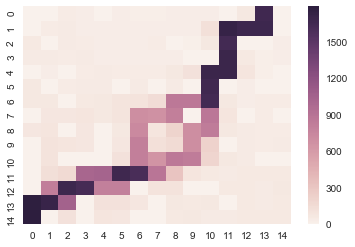

step:56022 Goal!
step:56056 Goal!
step:56086 Goal!
step:56115 Goal!
step:56148 Goal!
step:56180 Goal!
step:56212 Goal!
step:56240 Goal!
step:56272 Goal!
step:56307 Goal!
step:56337 Goal!
step:56365 Goal!
step:56395 Goal!
step:56425 Goal!
step:56460 Goal!
step:56493 Goal!
step:56523 Goal!
step:56551 Goal!
step:56582 Goal!
step:56617 Goal!
step:56647 Goal!
step:56681 Goal!
step:56712 Goal!
step:56741 Goal!
step:56774 Goal!
step:56805 Goal!
step:56835 Goal!
step:56863 Goal!
step:56892 Goal!
step:56925 Goal!
step:56956 Goal!
step:56989 Goal!
step:57000 MAP


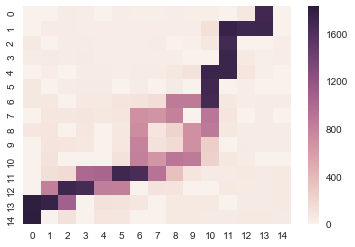

step:57017 Goal!
step:57050 Goal!
step:57082 Goal!
step:57116 Goal!
step:57147 Goal!
step:57177 Goal!
step:57212 Goal!
step:57248 Goal!
step:57281 Goal!
step:57311 Goal!
step:57342 Goal!
step:57372 Goal!
step:57402 Goal!
step:57440 Goal!
step:57468 Goal!
step:57502 Goal!
step:57532 Goal!
step:57568 Goal!
step:57598 Goal!
step:57630 Goal!
step:57658 Goal!
step:57686 Goal!
step:57714 Goal!
step:57746 Goal!
step:57784 Goal!
step:57824 Goal!
step:57852 Goal!
step:57882 Goal!
step:57910 Goal!
step:57942 Goal!
step:57973 Goal!
step:58000 MAP


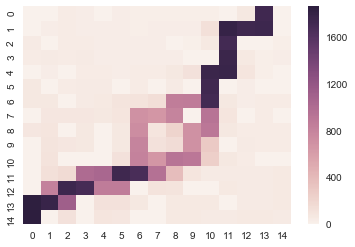

step:58004 Goal!
step:58033 Goal!
step:58066 Goal!
step:58097 Goal!
step:58130 Goal!
step:58166 Goal!
step:58197 Goal!
step:58230 Goal!
step:58260 Goal!
step:58288 Goal!
step:58318 Goal!
step:58346 Goal!
step:58377 Goal!
step:58407 Goal!
step:58437 Goal!
step:58467 Goal!
step:58495 Goal!
step:58530 Goal!
step:58559 Goal!
step:58590 Goal!
step:58625 Goal!
step:58656 Goal!
step:58684 Goal!
step:58716 Goal!
step:58747 Goal!
step:58775 Goal!
step:58807 Goal!
step:58839 Goal!
step:58872 Goal!
step:58902 Goal!
step:58931 Goal!
step:58965 Goal!
step:58999 Goal!
step:59000 MAP


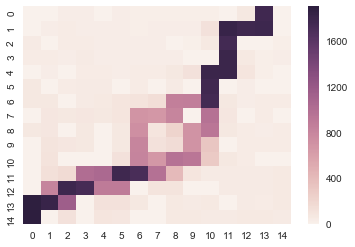

step:59030 Goal!
step:59062 Goal!
step:59092 Goal!
step:59120 Goal!
step:59150 Goal!
step:59181 Goal!
step:59213 Goal!
step:59241 Goal!
step:59269 Goal!
step:59301 Goal!
step:59337 Goal!
step:59378 Goal!
step:59420 Goal!
step:59452 Goal!
step:59482 Goal!
step:59516 Goal!
step:59549 Goal!
step:59580 Goal!
step:59610 Goal!
step:59638 Goal!
step:59668 Goal!
step:59700 Goal!
step:59728 Goal!
step:59761 Goal!
step:59794 Goal!
step:59823 Goal!
step:59852 Goal!
step:59888 Goal!
step:59921 Goal!
step:59952 Goal!
step:59983 Goal!
step:60000 MAP


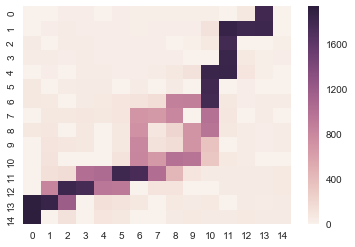

step:60014 Goal!
step:60046 Goal!
step:60082 Goal!
step:60112 Goal!
step:60144 Goal!
step:60178 Goal!
step:60209 Goal!
step:60241 Goal!
step:60278 Goal!
step:60308 Goal!
step:60340 Goal!
step:60372 Goal!
step:60406 Goal!
step:60443 Goal!
step:60475 Goal!
step:60505 Goal!
step:60533 Goal!
step:60565 Goal!
step:60595 Goal!
step:60630 Goal!
step:60661 Goal!
step:60691 Goal!
step:60723 Goal!
step:60751 Goal!
step:60781 Goal!
step:60809 Goal!
step:60842 Goal!
step:60872 Goal!
step:60904 Goal!
step:60937 Goal!
step:60965 Goal!
step:60995 Goal!
step:61000 MAP


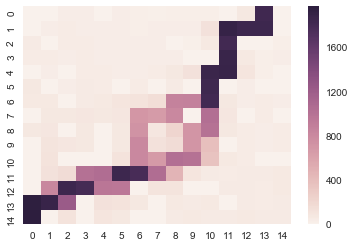

step:61035 Goal!
step:61065 Goal!
step:61093 Goal!
step:61127 Goal!
step:61158 Goal!
step:61189 Goal!
step:61220 Goal!
step:61250 Goal!
step:61278 Goal!
step:61306 Goal!
step:61338 Goal!
step:61372 Goal!
step:61403 Goal!
step:61433 Goal!
step:61463 Goal!
step:61491 Goal!
step:61520 Goal!
step:61554 Goal!
step:61582 Goal!
step:61615 Goal!
step:61646 Goal!
step:61681 Goal!
step:61709 Goal!
step:61743 Goal!
step:61771 Goal!
step:61801 Goal!
step:61830 Goal!
step:61860 Goal!
step:61889 Goal!
step:61919 Goal!
step:61950 Goal!
step:61984 Goal!
step:62000 MAP


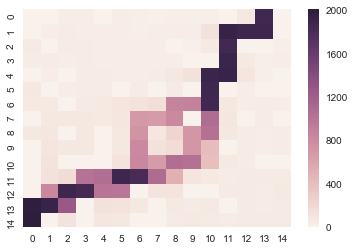

step:62016 Goal!
step:62044 Goal!
step:62076 Goal!
step:62115 Goal!
step:62145 Goal!
step:62177 Goal!
step:62210 Goal!
step:62242 Goal!
step:62274 Goal!
step:62308 Goal!
step:62341 Goal!
step:62378 Goal!
step:62415 Goal!
step:62443 Goal!
step:62484 Goal!
step:62516 Goal!
step:62554 Goal!
step:62585 Goal!
step:62619 Goal!
step:62649 Goal!
step:62677 Goal!
step:62706 Goal!
step:62736 Goal!
step:62764 Goal!
step:62796 Goal!
step:62829 Goal!
step:62863 Goal!
step:62891 Goal!
step:62924 Goal!
step:62955 Goal!
step:62983 Goal!
step:63000 MAP


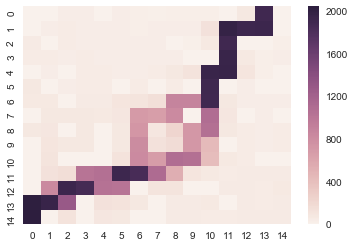

step:63018 Goal!
step:63047 Goal!
step:63077 Goal!
step:63105 Goal!
step:63137 Goal!
step:63167 Goal!
step:63195 Goal!
step:63223 Goal!
step:63253 Goal!
step:63283 Goal!
step:63314 Goal!
step:63358 Goal!
step:63386 Goal!
step:63420 Goal!
step:63450 Goal!
step:63480 Goal!
step:63514 Goal!
step:63546 Goal!
step:63574 Goal!
step:63606 Goal!
step:63638 Goal!
step:63671 Goal!
step:63702 Goal!
step:63734 Goal!
step:63765 Goal!
step:63795 Goal!
step:63825 Goal!
step:63854 Goal!
step:63884 Goal!
step:63920 Goal!
step:63949 Goal!
step:63981 Goal!
step:64000 MAP


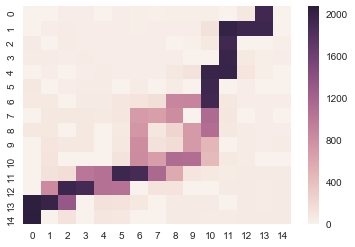

step:64009 Goal!
step:64040 Goal!
step:64073 Goal!
step:64101 Goal!
step:64131 Goal!
step:64161 Goal!
step:64193 Goal!
step:64225 Goal!
step:64257 Goal!
step:64285 Goal!
step:64313 Goal!
step:64344 Goal!
step:64375 Goal!
step:64407 Goal!
step:64442 Goal!
step:64477 Goal!
step:64505 Goal!
step:64537 Goal!
step:64565 Goal!
step:64594 Goal!
step:64625 Goal!
step:64656 Goal!
step:64691 Goal!
step:64723 Goal!
step:64751 Goal!
step:64779 Goal!
step:64807 Goal!
step:64837 Goal!
step:64866 Goal!
step:64897 Goal!
step:64928 Goal!
step:64959 Goal!
step:64993 Goal!
step:65000 MAP


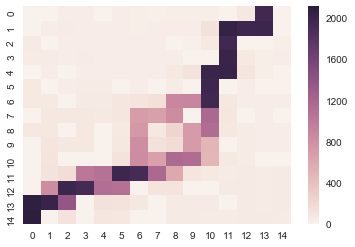

step:65023 Goal!
step:65057 Goal!
step:65093 Goal!
step:65125 Goal!
step:65155 Goal!
step:65186 Goal!
step:65220 Goal!
step:65248 Goal!
step:65282 Goal!
step:65315 Goal!
step:65347 Goal!
step:65381 Goal!
step:65409 Goal!
step:65440 Goal!
step:65476 Goal!
step:65507 Goal!
step:65539 Goal!
step:65578 Goal!
step:65609 Goal!
step:65638 Goal!
step:65671 Goal!
step:65708 Goal!
step:65743 Goal!
step:65774 Goal!
step:65802 Goal!
step:65834 Goal!
step:65862 Goal!
step:65890 Goal!
step:65918 Goal!
step:65947 Goal!
step:65975 Goal!
step:66000 MAP


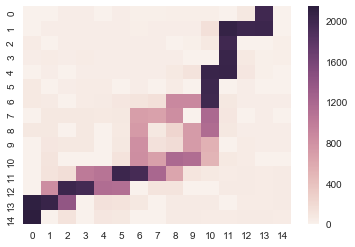

step:66003 Goal!
step:66037 Goal!
step:66071 Goal!
step:66101 Goal!
step:66132 Goal!
step:66162 Goal!
step:66198 Goal!
step:66232 Goal!
step:66263 Goal!
step:66292 Goal!
step:66327 Goal!
step:66355 Goal!
step:66389 Goal!
step:66417 Goal!
step:66447 Goal!
step:66475 Goal!
step:66504 Goal!
step:66538 Goal!
step:66568 Goal!
step:66604 Goal!
step:66638 Goal!
step:66676 Goal!
step:66705 Goal!
step:66737 Goal!
step:66768 Goal!
step:66799 Goal!
step:66830 Goal!
step:66858 Goal!
step:66890 Goal!
step:66928 Goal!
step:66958 Goal!
step:66990 Goal!
step:67000 MAP


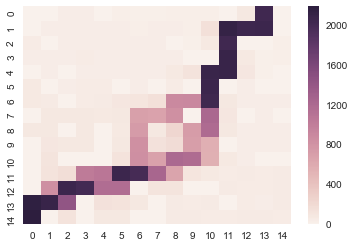

step:67021 Goal!
step:67050 Goal!
step:67080 Goal!
step:67110 Goal!
step:67145 Goal!
step:67173 Goal!
step:67204 Goal!
step:67236 Goal!
step:67266 Goal!
step:67297 Goal!
step:67329 Goal!
step:67361 Goal!
step:67390 Goal!
step:67422 Goal!
step:67453 Goal!
step:67491 Goal!
step:67520 Goal!
step:67559 Goal!
step:67591 Goal!
step:67622 Goal!
step:67657 Goal!
step:67694 Goal!
step:67722 Goal!
step:67758 Goal!
step:67788 Goal!
step:67816 Goal!
step:67848 Goal!
step:67880 Goal!
step:67913 Goal!
step:67948 Goal!
step:67979 Goal!
step:68000 MAP


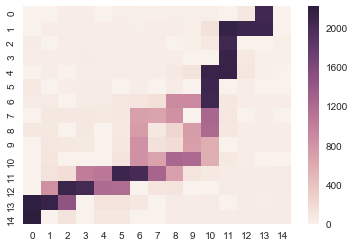

step:68007 Goal!
step:68041 Goal!
step:68071 Goal!
step:68104 Goal!
step:68138 Goal!
step:68177 Goal!
step:68208 Goal!
step:68244 Goal!
step:68274 Goal!
step:68302 Goal!
step:68333 Goal!
step:68368 Goal!
step:68398 Goal!
step:68430 Goal!
step:68462 Goal!
step:68496 Goal!
step:68528 Goal!
step:68556 Goal!
step:68588 Goal!
step:68622 Goal!
step:68653 Goal!
step:68683 Goal!
step:68713 Goal!
step:68743 Goal!
step:68779 Goal!
step:68810 Goal!
step:68844 Goal!
step:68876 Goal!
step:68906 Goal!
step:68939 Goal!
step:68967 Goal!
step:68997 Goal!
step:69000 MAP


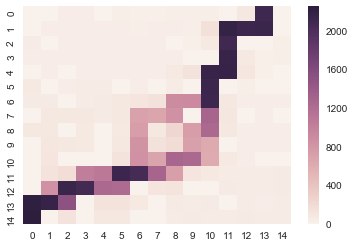

step:69028 Goal!
step:69061 Goal!
step:69090 Goal!
step:69120 Goal!
step:69149 Goal!
step:69181 Goal!
step:69212 Goal!
step:69240 Goal!
step:69268 Goal!
step:69297 Goal!
step:69325 Goal!
step:69362 Goal!
step:69390 Goal!
step:69420 Goal!
step:69452 Goal!
step:69488 Goal!
step:69524 Goal!
step:69554 Goal!
step:69586 Goal!
step:69616 Goal!
step:69647 Goal!
step:69680 Goal!
step:69711 Goal!
step:69741 Goal!
step:69772 Goal!
step:69802 Goal!
step:69834 Goal!
step:69862 Goal!
step:69893 Goal!
step:69923 Goal!
step:69957 Goal!
step:69986 Goal!
step:70000 MAP


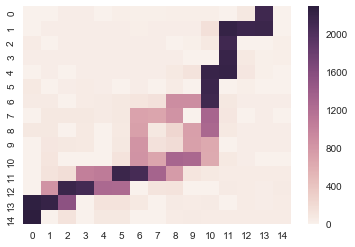

step:70016 Goal!
step:70046 Goal!
step:70078 Goal!
step:70106 Goal!
step:70136 Goal!
step:70164 Goal!
step:70195 Goal!
step:70226 Goal!
step:70257 Goal!
step:70287 Goal!
step:70317 Goal!
step:70347 Goal!
step:70380 Goal!
step:70409 Goal!
step:70438 Goal!
step:70472 Goal!
step:70502 Goal!
step:70534 Goal!
step:70562 Goal!
step:70594 Goal!
step:70632 Goal!
step:70665 Goal!
step:70693 Goal!
step:70722 Goal!
step:70750 Goal!
step:70778 Goal!
step:70806 Goal!
step:70834 Goal!
step:70865 Goal!
step:70897 Goal!
step:70927 Goal!
step:70961 Goal!
step:70990 Goal!
step:71000 MAP


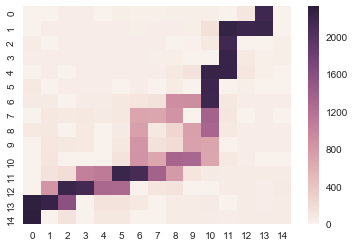

step:71024 Goal!
step:71052 Goal!
step:71082 Goal!
step:71113 Goal!
step:71142 Goal!
step:71178 Goal!
step:71209 Goal!
step:71237 Goal!
step:71277 Goal!
step:71305 Goal!
step:71338 Goal!
step:71375 Goal!
step:71405 Goal!
step:71439 Goal!
step:71469 Goal!
step:71499 Goal!
step:71529 Goal!
step:71563 Goal!
step:71595 Goal!
step:71625 Goal!
step:71661 Goal!
step:71690 Goal!
step:71723 Goal!
step:71753 Goal!
step:71787 Goal!
step:71817 Goal!
step:71854 Goal!
step:71889 Goal!
step:71923 Goal!
step:71956 Goal!
step:71993 Goal!
step:72000 MAP


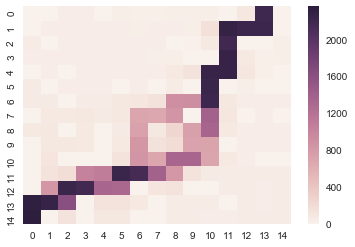

step:72025 Goal!
step:72053 Goal!
step:72083 Goal!
step:72112 Goal!
step:72140 Goal!
step:72177 Goal!
step:72205 Goal!
step:72235 Goal!
step:72265 Goal!
step:72299 Goal!
step:72339 Goal!
step:72368 Goal!
step:72396 Goal!
step:72426 Goal!
step:72460 Goal!
step:72494 Goal!
step:72526 Goal!
step:72564 Goal!
step:72594 Goal!
step:72625 Goal!
step:72653 Goal!
step:72687 Goal!
step:72725 Goal!
step:72753 Goal!
step:72784 Goal!
step:72812 Goal!
step:72846 Goal!
step:72878 Goal!
step:72908 Goal!
step:72939 Goal!
step:72973 Goal!
step:73000 MAP


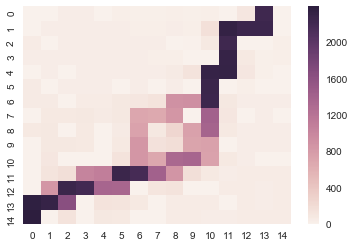

step:73002 Goal!
step:73032 Goal!
step:73063 Goal!
step:73095 Goal!
step:73130 Goal!
step:73160 Goal!
step:73189 Goal!
step:73227 Goal!
step:73255 Goal!
step:73285 Goal!
step:73319 Goal!
step:73352 Goal!
step:73387 Goal!
step:73421 Goal!
step:73451 Goal!
step:73481 Goal!
step:73510 Goal!
step:73538 Goal!
step:73568 Goal!
step:73598 Goal!
step:73631 Goal!
step:73664 Goal!
step:73695 Goal!
step:73726 Goal!
step:73756 Goal!
step:73785 Goal!
step:73815 Goal!
step:73848 Goal!
step:73882 Goal!
step:73911 Goal!
step:73941 Goal!
step:73971 Goal!
step:73999 Goal!
step:74000 MAP


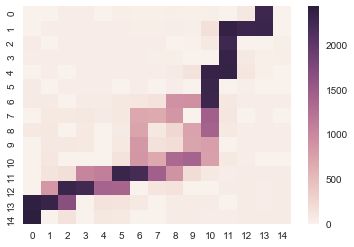

step:74031 Goal!
step:74065 Goal!
step:74100 Goal!
step:74128 Goal!
step:74159 Goal!
step:74194 Goal!
step:74228 Goal!
step:74259 Goal!
step:74292 Goal!
step:74320 Goal!
step:74356 Goal!
step:74392 Goal!
step:74421 Goal!
step:74454 Goal!
step:74486 Goal!
step:74516 Goal!
step:74551 Goal!
step:74581 Goal!
step:74611 Goal!
step:74641 Goal!
step:74669 Goal!
step:74697 Goal!
step:74725 Goal!
step:74758 Goal!
step:74788 Goal!
step:74819 Goal!
step:74851 Goal!
step:74882 Goal!
step:74915 Goal!
step:74945 Goal!
step:74975 Goal!
step:75000 MAP


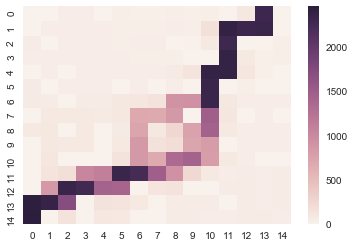

step:75006 Goal!
step:75034 Goal!
step:75066 Goal!
step:75104 Goal!
step:75136 Goal!
step:75166 Goal!
step:75194 Goal!
step:75228 Goal!
step:75262 Goal!
step:75294 Goal!
step:75328 Goal!
step:75361 Goal!
step:75393 Goal!
step:75423 Goal!
step:75453 Goal!
step:75486 Goal!
step:75514 Goal!
step:75547 Goal!
step:75575 Goal!
step:75605 Goal!
step:75635 Goal!
step:75673 Goal!
step:75703 Goal!
step:75738 Goal!
step:75767 Goal!
step:75797 Goal!
step:75829 Goal!
step:75859 Goal!
step:75893 Goal!
step:75925 Goal!
step:75954 Goal!
step:75982 Goal!
step:76000 MAP


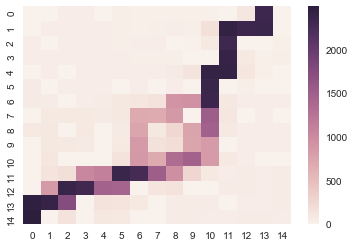

step:76014 Goal!
step:76046 Goal!
step:76078 Goal!
step:76109 Goal!
step:76140 Goal!
step:76170 Goal!
step:76203 Goal!
step:76233 Goal!
step:76265 Goal!
step:76295 Goal!
step:76327 Goal!
step:76358 Goal!
step:76388 Goal!
step:76428 Goal!
step:76463 Goal!
step:76494 Goal!
step:76523 Goal!
step:76551 Goal!
step:76581 Goal!
step:76610 Goal!
step:76647 Goal!
step:76679 Goal!
step:76707 Goal!
step:76735 Goal!
step:76774 Goal!
step:76804 Goal!
step:76839 Goal!
step:76869 Goal!
step:76901 Goal!
step:76933 Goal!
step:76968 Goal!
step:77000 Goal!
step:77000 MAP


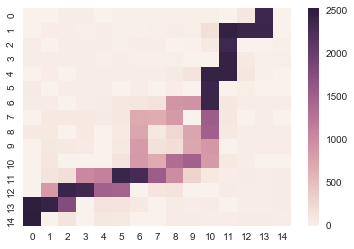

step:77028 Goal!
step:77057 Goal!
step:77089 Goal!
step:77121 Goal!
step:77151 Goal!
step:77183 Goal!
step:77216 Goal!
step:77248 Goal!
step:77278 Goal!
step:77313 Goal!
step:77345 Goal!
step:77377 Goal!
step:77405 Goal!
step:77447 Goal!
step:77478 Goal!
step:77508 Goal!
step:77538 Goal!
step:77568 Goal!
step:77602 Goal!
step:77637 Goal!
step:77670 Goal!
step:77707 Goal!
step:77738 Goal!
step:77767 Goal!
step:77797 Goal!
step:77826 Goal!
step:77858 Goal!
step:77888 Goal!
step:77917 Goal!
step:77947 Goal!
step:77980 Goal!
step:78000 MAP


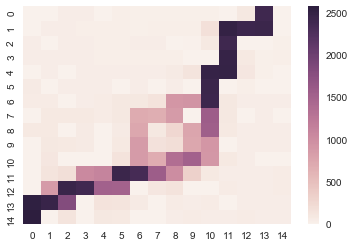

step:78018 Goal!
step:78049 Goal!
step:78077 Goal!
step:78105 Goal!
step:78135 Goal!
step:78166 Goal!
step:78194 Goal!
step:78226 Goal!
step:78260 Goal!
step:78288 Goal!
step:78320 Goal!
step:78350 Goal!
step:78380 Goal!
step:78414 Goal!
step:78444 Goal!
step:78474 Goal!
step:78508 Goal!
step:78538 Goal!
step:78570 Goal!
step:78599 Goal!
step:78632 Goal!
step:78664 Goal!
step:78699 Goal!
step:78733 Goal!
step:78765 Goal!
step:78797 Goal!
step:78831 Goal!
step:78862 Goal!
step:78890 Goal!
step:78920 Goal!
step:78948 Goal!
step:78976 Goal!
step:79000 MAP


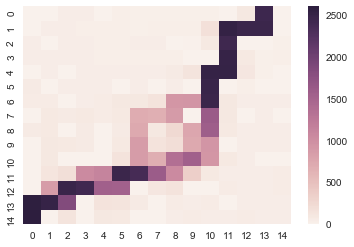

step:79007 Goal!
step:79041 Goal!
step:79073 Goal!
step:79101 Goal!
step:79136 Goal!
step:79172 Goal!
step:79203 Goal!
step:79234 Goal!
step:79268 Goal!
step:79304 Goal!
step:79337 Goal!
step:79369 Goal!
step:79403 Goal!
step:79431 Goal!
step:79463 Goal!
step:79505 Goal!
step:79542 Goal!
step:79573 Goal!
step:79607 Goal!
step:79637 Goal!
step:79668 Goal!
step:79701 Goal!
step:79732 Goal!
step:79761 Goal!
step:79789 Goal!
step:79820 Goal!
step:79854 Goal!
step:79885 Goal!
step:79917 Goal!
step:79950 Goal!
step:79983 Goal!
step:80000 MAP


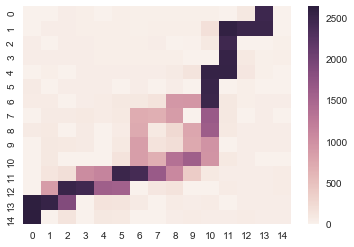

step:80014 Goal!
step:80046 Goal!
step:80076 Goal!
step:80104 Goal!
step:80134 Goal!
step:80162 Goal!
step:80194 Goal!
step:80224 Goal!
step:80256 Goal!
step:80286 Goal!
step:80315 Goal!
step:80347 Goal!
step:80376 Goal!
step:80412 Goal!
step:80446 Goal!
step:80478 Goal!
step:80510 Goal!
step:80539 Goal!
step:80569 Goal!
step:80597 Goal!
step:80632 Goal!
step:80663 Goal!
step:80696 Goal!
step:80732 Goal!
step:80762 Goal!
step:80795 Goal!
step:80829 Goal!
step:80860 Goal!
step:80890 Goal!
step:80918 Goal!
step:80950 Goal!
step:80978 Goal!
step:81000 MAP


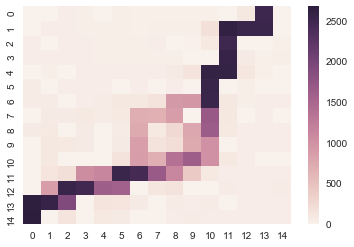

step:81013 Goal!
step:81044 Goal!
step:81076 Goal!
step:81112 Goal!
step:81143 Goal!
step:81173 Goal!
step:81203 Goal!
step:81233 Goal!
step:81261 Goal!
step:81293 Goal!
step:81324 Goal!
step:81355 Goal!
step:81388 Goal!
step:81416 Goal!
step:81449 Goal!
step:81480 Goal!
step:81523 Goal!
step:81558 Goal!
step:81588 Goal!
step:81616 Goal!
step:81648 Goal!
step:81677 Goal!
step:81707 Goal!
step:81740 Goal!
step:81772 Goal!
step:81802 Goal!
step:81830 Goal!
step:81866 Goal!
step:81905 Goal!
step:81936 Goal!
step:81970 Goal!
step:82000 MAP


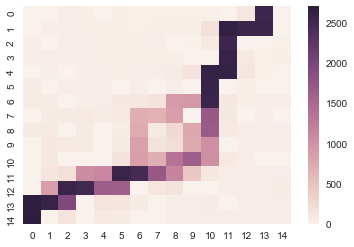

step:82001 Goal!
step:82039 Goal!
step:82072 Goal!
step:82106 Goal!
step:82137 Goal!
step:82166 Goal!
step:82197 Goal!
step:82225 Goal!
step:82255 Goal!
step:82284 Goal!
step:82312 Goal!
step:82346 Goal!
step:82379 Goal!
step:82413 Goal!
step:82448 Goal!
step:82478 Goal!
step:82511 Goal!
step:82542 Goal!
step:82571 Goal!
step:82603 Goal!
step:82633 Goal!
step:82667 Goal!
step:82700 Goal!
step:82736 Goal!
step:82767 Goal!
step:82802 Goal!
step:82835 Goal!
step:82867 Goal!
step:82903 Goal!
step:82936 Goal!
step:82964 Goal!
step:82994 Goal!
step:83000 MAP


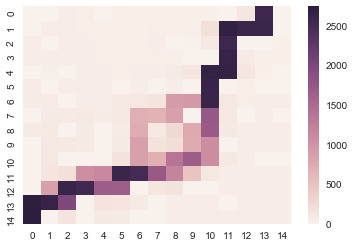

step:83022 Goal!
step:83050 Goal!
step:83084 Goal!
step:83114 Goal!
step:83148 Goal!
step:83178 Goal!
step:83208 Goal!
step:83239 Goal!
step:83272 Goal!
step:83302 Goal!
step:83330 Goal!
step:83364 Goal!
step:83405 Goal!
step:83441 Goal!
step:83476 Goal!
step:83510 Goal!
step:83544 Goal!
step:83581 Goal!
step:83615 Goal!
step:83650 Goal!
step:83683 Goal!
step:83713 Goal!
step:83745 Goal!
step:83775 Goal!
step:83807 Goal!
step:83837 Goal!
step:83868 Goal!
step:83897 Goal!
step:83929 Goal!
step:83965 Goal!
step:83995 Goal!
step:84000 MAP


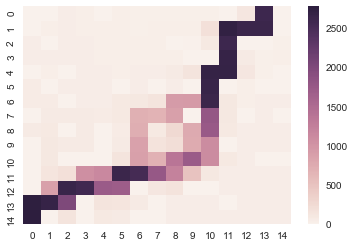

step:84027 Goal!
step:84063 Goal!
step:84094 Goal!
step:84124 Goal!
step:84159 Goal!
step:84197 Goal!
step:84227 Goal!
step:84259 Goal!
step:84295 Goal!
step:84323 Goal!
step:84359 Goal!
step:84387 Goal!
step:84423 Goal!
step:84453 Goal!
step:84483 Goal!
step:84511 Goal!
step:84543 Goal!
step:84571 Goal!
step:84605 Goal!
step:84636 Goal!
step:84666 Goal!
step:84696 Goal!
step:84724 Goal!
step:84761 Goal!
step:84794 Goal!
step:84831 Goal!
step:84859 Goal!
step:84889 Goal!
step:84923 Goal!
step:84951 Goal!
step:84982 Goal!
step:85000 MAP


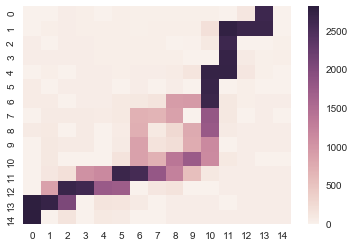

step:85016 Goal!
step:85047 Goal!
step:85079 Goal!
step:85107 Goal!
step:85138 Goal!
step:85168 Goal!
step:85196 Goal!
step:85226 Goal!
step:85258 Goal!
step:85289 Goal!
step:85319 Goal!
step:85349 Goal!
step:85387 Goal!
step:85422 Goal!
step:85453 Goal!
step:85485 Goal!
step:85513 Goal!
step:85541 Goal!
step:85573 Goal!
step:85603 Goal!
step:85632 Goal!
step:85663 Goal!
step:85691 Goal!
step:85721 Goal!
step:85750 Goal!
step:85780 Goal!
step:85810 Goal!
step:85847 Goal!
step:85875 Goal!
step:85906 Goal!
step:85939 Goal!
step:85973 Goal!
step:86000 MAP


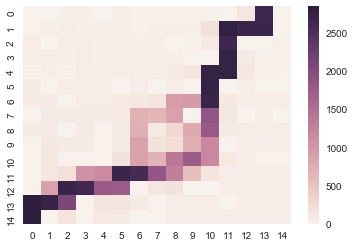

step:86002 Goal!
step:86032 Goal!
step:86067 Goal!
step:86099 Goal!
step:86129 Goal!
step:86161 Goal!
step:86191 Goal!
step:86221 Goal!
step:86255 Goal!
step:86287 Goal!
step:86320 Goal!
step:86350 Goal!
step:86381 Goal!
step:86411 Goal!
step:86439 Goal!
step:86473 Goal!
step:86502 Goal!
step:86536 Goal!
step:86573 Goal!
step:86603 Goal!
step:86631 Goal!
step:86662 Goal!
step:86695 Goal!
step:86730 Goal!
step:86760 Goal!
step:86790 Goal!
step:86819 Goal!
step:86850 Goal!
step:86880 Goal!
step:86910 Goal!
step:86941 Goal!
step:86972 Goal!
step:87000 MAP


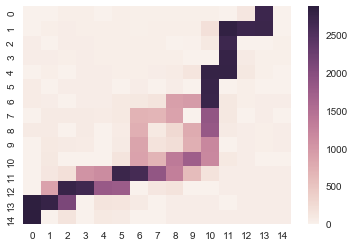

step:87004 Goal!
step:87032 Goal!
step:87062 Goal!
step:87093 Goal!
step:87131 Goal!
step:87162 Goal!
step:87199 Goal!
step:87233 Goal!
step:87261 Goal!
step:87289 Goal!
step:87317 Goal!
step:87348 Goal!
step:87378 Goal!
step:87409 Goal!
step:87438 Goal!
step:87467 Goal!
step:87497 Goal!
step:87529 Goal!
step:87564 Goal!
step:87594 Goal!
step:87628 Goal!
step:87658 Goal!
step:87689 Goal!
step:87719 Goal!
step:87755 Goal!
step:87791 Goal!
step:87823 Goal!
step:87853 Goal!
step:87884 Goal!
step:87919 Goal!
step:87948 Goal!
step:87976 Goal!
step:88000 MAP


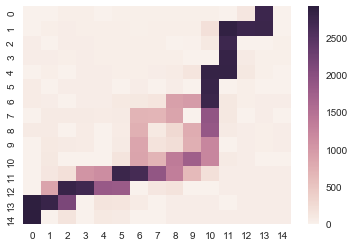

step:88007 Goal!
step:88038 Goal!
step:88071 Goal!
step:88100 Goal!
step:88136 Goal!
step:88166 Goal!
step:88200 Goal!
step:88232 Goal!
step:88262 Goal!
step:88294 Goal!
step:88324 Goal!
step:88356 Goal!
step:88388 Goal!
step:88416 Goal!
step:88451 Goal!
step:88483 Goal!
step:88519 Goal!
step:88549 Goal!
step:88583 Goal!
step:88616 Goal!
step:88644 Goal!
step:88677 Goal!
step:88709 Goal!
step:88739 Goal!
step:88767 Goal!
step:88797 Goal!
step:88825 Goal!
step:88856 Goal!
step:88888 Goal!
step:88921 Goal!
step:88956 Goal!
step:88988 Goal!
step:89000 MAP


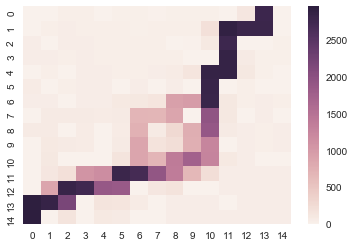

step:89021 Goal!
step:89052 Goal!
step:89085 Goal!
step:89117 Goal!
step:89148 Goal!
step:89177 Goal!
step:89210 Goal!
step:89249 Goal!
step:89280 Goal!
step:89308 Goal!
step:89338 Goal!
step:89367 Goal!
step:89401 Goal!
step:89430 Goal!
step:89461 Goal!
step:89492 Goal!
step:89524 Goal!
step:89558 Goal!
step:89588 Goal!
step:89621 Goal!
step:89651 Goal!
step:89681 Goal!
step:89713 Goal!
step:89749 Goal!
step:89777 Goal!
step:89807 Goal!
step:89836 Goal!
step:89865 Goal!
step:89901 Goal!
step:89933 Goal!
step:89963 Goal!
step:89991 Goal!
step:90000 MAP


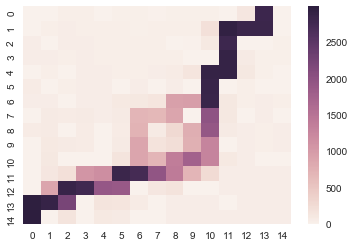

step:90021 Goal!
step:90051 Goal!
step:90080 Goal!
step:90114 Goal!
step:90147 Goal!
step:90180 Goal!
step:90209 Goal!
step:90246 Goal!
step:90281 Goal!
step:90312 Goal!
step:90344 Goal!
step:90374 Goal!
step:90404 Goal!
step:90440 Goal!
step:90471 Goal!
step:90501 Goal!
step:90530 Goal!
step:90559 Goal!
step:90593 Goal!
step:90625 Goal!
step:90662 Goal!
step:90695 Goal!
step:90723 Goal!
step:90753 Goal!
step:90787 Goal!
step:90817 Goal!
step:90847 Goal!
step:90875 Goal!
step:90904 Goal!
step:90936 Goal!
step:90965 Goal!
step:90995 Goal!
step:91000 MAP


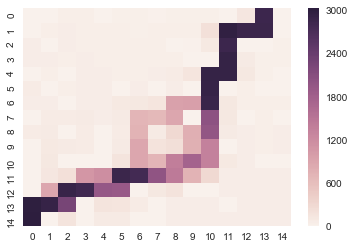

step:91026 Goal!
step:91054 Goal!
step:91091 Goal!
step:91124 Goal!
step:91156 Goal!
step:91186 Goal!
step:91220 Goal!
step:91250 Goal!
step:91282 Goal!
step:91313 Goal!
step:91343 Goal!
step:91376 Goal!
step:91404 Goal!
step:91433 Goal!
step:91464 Goal!
step:91496 Goal!
step:91525 Goal!
step:91557 Goal!
step:91586 Goal!
step:91617 Goal!
step:91649 Goal!
step:91686 Goal!
step:91725 Goal!
step:91758 Goal!
step:91786 Goal!
step:91814 Goal!
step:91843 Goal!
step:91872 Goal!
step:91907 Goal!
step:91943 Goal!
step:91973 Goal!
step:92000 MAP


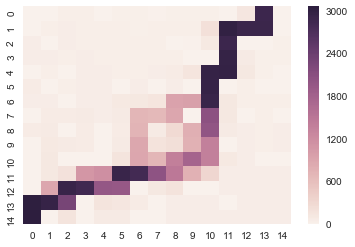

step:92005 Goal!
step:92035 Goal!
step:92065 Goal!
step:92096 Goal!
step:92124 Goal!
step:92155 Goal!
step:92186 Goal!
step:92215 Goal!
step:92252 Goal!
step:92282 Goal!
step:92310 Goal!
step:92344 Goal!
step:92377 Goal!
step:92408 Goal!
step:92440 Goal!
step:92468 Goal!
step:92501 Goal!
step:92529 Goal!
step:92558 Goal!
step:92590 Goal!
step:92618 Goal!
step:92655 Goal!
step:92687 Goal!
step:92715 Goal!
step:92748 Goal!
step:92779 Goal!
step:92810 Goal!
step:92838 Goal!
step:92866 Goal!
step:92901 Goal!
step:92933 Goal!
step:92963 Goal!
step:92993 Goal!
step:93000 MAP


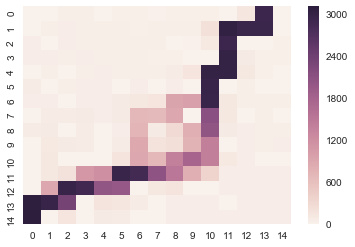

step:93028 Goal!
step:93058 Goal!
step:93088 Goal!
step:93122 Goal!
step:93159 Goal!
step:93199 Goal!
step:93228 Goal!
step:93261 Goal!
step:93292 Goal!
step:93322 Goal!
step:93354 Goal!
step:93386 Goal!
step:93416 Goal!
step:93448 Goal!
step:93480 Goal!
step:93508 Goal!
step:93537 Goal!
step:93571 Goal!
step:93599 Goal!
step:93629 Goal!
step:93658 Goal!
step:93686 Goal!
step:93723 Goal!
step:93751 Goal!
step:93781 Goal!
step:93812 Goal!
step:93841 Goal!
step:93875 Goal!
step:93905 Goal!
step:93934 Goal!
step:93966 Goal!
step:94000 MAP


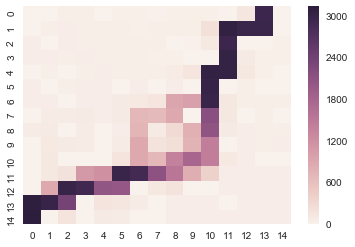

step:94007 Goal!
step:94045 Goal!
step:94090 Goal!
step:94120 Goal!
step:94151 Goal!
step:94182 Goal!
step:94217 Goal!
step:94251 Goal!
step:94279 Goal!
step:94307 Goal!
step:94336 Goal!
step:94364 Goal!
step:94392 Goal!
step:94426 Goal!
step:94454 Goal!
step:94482 Goal!
step:94510 Goal!
step:94542 Goal!
step:94573 Goal!
step:94605 Goal!
step:94639 Goal!
step:94668 Goal!
step:94698 Goal!
step:94728 Goal!
step:94757 Goal!
step:94787 Goal!
step:94823 Goal!
step:94853 Goal!
step:94887 Goal!
step:94915 Goal!
step:94949 Goal!
step:94978 Goal!
step:95000 MAP


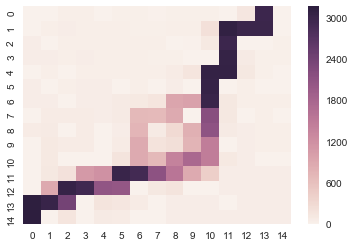

step:95010 Goal!
step:95038 Goal!
step:95070 Goal!
step:95100 Goal!
step:95130 Goal!
step:95164 Goal!
step:95194 Goal!
step:95226 Goal!
step:95257 Goal!
step:95290 Goal!
step:95322 Goal!
step:95354 Goal!
step:95384 Goal!
step:95413 Goal!
step:95446 Goal!
step:95476 Goal!
step:95510 Goal!
step:95544 Goal!
step:95577 Goal!
step:95609 Goal!
step:95638 Goal!
step:95678 Goal!
step:95706 Goal!
step:95735 Goal!
step:95765 Goal!
step:95794 Goal!
step:95828 Goal!
step:95860 Goal!
step:95889 Goal!
step:95920 Goal!
step:95951 Goal!
step:95981 Goal!
step:96000 MAP


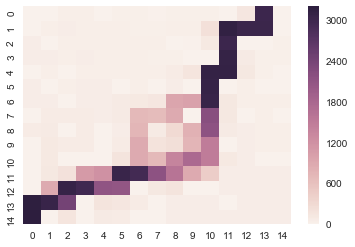

step:96016 Goal!
step:96047 Goal!
step:96077 Goal!
step:96107 Goal!
step:96139 Goal!
step:96173 Goal!
step:96203 Goal!
step:96235 Goal!
step:96264 Goal!
step:96296 Goal!
step:96328 Goal!
step:96359 Goal!
step:96387 Goal!
step:96415 Goal!
step:96445 Goal!
step:96473 Goal!
step:96501 Goal!
step:96529 Goal!
step:96564 Goal!
step:96598 Goal!
step:96631 Goal!
step:96661 Goal!
step:96692 Goal!
step:96725 Goal!
step:96760 Goal!
step:96791 Goal!
step:96820 Goal!
step:96852 Goal!
step:96889 Goal!
step:96919 Goal!
step:96954 Goal!
step:96982 Goal!
step:97000 MAP


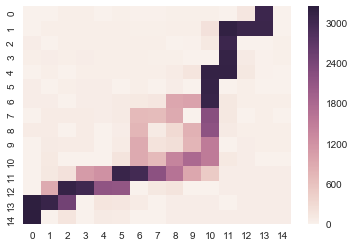

step:97013 Goal!
step:97041 Goal!
step:97076 Goal!
step:97104 Goal!
step:97134 Goal!
step:97162 Goal!
step:97192 Goal!
step:97224 Goal!
step:97257 Goal!
step:97286 Goal!
step:97318 Goal!
step:97352 Goal!
step:97382 Goal!
step:97415 Goal!
step:97446 Goal!
step:97482 Goal!
step:97512 Goal!
step:97540 Goal!
step:97568 Goal!
step:97606 Goal!
step:97634 Goal!
step:97663 Goal!
step:97692 Goal!
step:97726 Goal!
step:97757 Goal!
step:97785 Goal!
step:97815 Goal!
step:97843 Goal!
step:97876 Goal!
step:97906 Goal!
step:97938 Goal!
step:97969 Goal!
step:97998 Goal!
step:98000 MAP


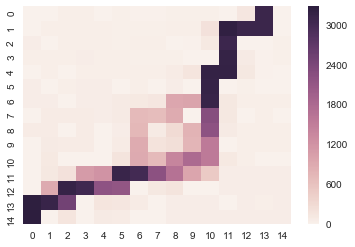

step:98030 Goal!
step:98058 Goal!
step:98092 Goal!
step:98122 Goal!
step:98154 Goal!
step:98184 Goal!
step:98216 Goal!
step:98247 Goal!
step:98281 Goal!
step:98313 Goal!
step:98348 Goal!
step:98377 Goal!
step:98409 Goal!
step:98438 Goal!
step:98476 Goal!
step:98510 Goal!
step:98538 Goal!
step:98567 Goal!
step:98598 Goal!
step:98628 Goal!
step:98660 Goal!
step:98688 Goal!
step:98722 Goal!
step:98750 Goal!
step:98782 Goal!
step:98821 Goal!
step:98850 Goal!
step:98890 Goal!
step:98921 Goal!
step:98951 Goal!
step:98981 Goal!
step:99000 MAP


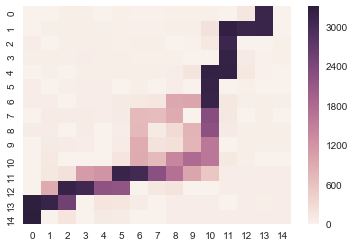

step:99015 Goal!
step:99046 Goal!
step:99075 Goal!
step:99114 Goal!
step:99142 Goal!
step:99174 Goal!
step:99207 Goal!
step:99237 Goal!
step:99265 Goal!
step:99295 Goal!
step:99323 Goal!
step:99354 Goal!
step:99384 Goal!
step:99416 Goal!
step:99448 Goal!
step:99479 Goal!
step:99510 Goal!
step:99543 Goal!
step:99576 Goal!
step:99609 Goal!
step:99642 Goal!
step:99670 Goal!
step:99698 Goal!
step:99732 Goal!
step:99764 Goal!
step:99792 Goal!
step:99829 Goal!
step:99857 Goal!
step:99891 Goal!
step:99924 Goal!
step:99955 Goal!
step:99985 Goal!


In [10]:
# learn

alpha = 0.9
gamma = 0.9
epsilon = 0.1
reward = 10

Rmat = set_Rmat(states, actions, reward)

start = states[-1][0]
goal = states[0][-1]

state = start

history = []

num_step = 100000

obstacle = m.obstacle

for step in range(num_step):
    a.take_action(state, epsilon)
    next_state = state_transition(state, a.action, maze_size, m.obstacle)
    a.update_Q(alpha, gamma, Rmat, state, next_state, actions)
    history.append(state)
    if next_state == goal:
        state = start
        print('step:{} Goal!'.format(step))
    else:
        state = next_state
        
    if step % (num_step / 100) == 0:
        counter = [0] * maze_size * maze_size
        for i in range(len(history)):
            counter[history[i]] += 1
        sns.heatmap(np.reshape(np.array(counter), [maze_size, maze_size]))
        print('step:{} MAP'.format(step))
        plt.show()

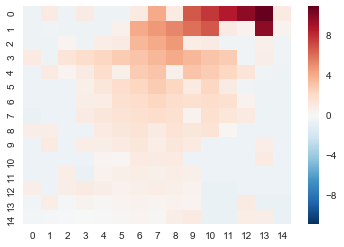

In [99]:
# visualize Q-value
sns.heatmap(a.Qmat.max(axis=1).reshape([maze_size, maze_size]))

In [100]:
#test
epsilon = 0
history_test = []

state = start

for step in range(100):
    a.take_action(state, epsilon)
    next_state = state_transition(state, a.action, maze_size, m.obstacle)
    if next_state == goal:
        state = start
    else:
        state = next_state
    history_test.append(state)

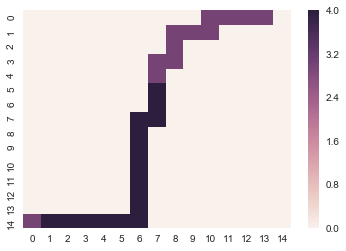

In [101]:
# visualize performance of learned agent
counter = [0] * maze_size * maze_size
for i in range(len(history_test)):
    counter[history_test[i]] += 1
sns.heatmap(np.reshape(np.array(counter), [maze_size, maze_size]))